## 1. Data Collection, Cleaning and Preparation

#### importing necessary libraries

In [874]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import seaborn as sns

#### Loading the Data

In [875]:
url1 = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
# url2 = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

In [876]:
df = pd.read_csv(url1)
# data2 = pd.read_csv(url2)

## Preliminary Data Analysis

In [877]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [878]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [879]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [880]:
print(len(df))
# print(len(data2))
# print(len(dataset))



614


In [881]:
df.shape

(614, 13)

In [882]:
missing_total = df.isna().sum()
missing_total

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [883]:
missing_total.sum()

np.int64(149)

In [884]:
len(df)

614

## Data Cleaning

In [885]:
df[df["Married"].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [886]:
# Drop missingness where minimal

df.dropna(subset=["Married"], inplace=True)
df.dropna(subset=["Loan_Amount_Term"], inplace=True)
df.dropna(subset=["Gender"], inplace=True)
df.dropna(subset=["Dependents"], inplace=True)


In [887]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

#### Outlier-Handling Pipeline

In [888]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

- revealing outliers by skewness

In [889]:
for col in numeric_cols:
    print(f'{col} = "{df[col].skew():.3f}" skewness value')

ApplicantIncome = "6.868" skewness value
CoapplicantIncome = "7.421" skewness value
LoanAmount = "2.486" skewness value
Loan_Amount_Term = "-2.425" skewness value
Credit_History = "-2.044" skewness value


In [890]:
# Replace other missing fields with proper means

df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)

df["Credit_History"].fillna(df["Credit_History"].median(), inplace=True)

df['Dependents'] = df['Dependents'].replace("3+", 3).astype(int)


C:\Users\USER\AppData\Local\Temp\ipykernel_17788\1149166029.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_17788\1149166029.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [891]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- now our data appears to be free of missingness at this point

## Exploratory Data Analysis

### Descriptive Data Summary

In [892]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.001808,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [893]:
df.shape

(573, 13)

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    object 
 2   Married            573 non-null    object 
 3   Dependents         573 non-null    int64  
 4   Education          573 non-null    object 
 5   Self_Employed      573 non-null    object 
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         573 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     573 non-null    float64
 11  Property_Area      573 non-null    object 
 12  Loan_Status        573 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.7+ KB


In [895]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.766143,5328.514834,1641.359372,146.001808,341.675393,0.869110
std,1.009278,5909.329219,3001.139055,82.569519,65.186012,0.337575
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,2.000000,5815.000000,2302.000000,165.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [896]:
df.nunique()

Loan_ID              573
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      469
CoapplicantIncome    274
LoanAmount           200
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Exploratory Data Analysis


In [897]:
average_income = df["ApplicantIncome"].mean()

high_income = df[df["ApplicantIncome"] > average_income]
lesser_income = df[df["ApplicantIncome"] < average_income]


def get_income_rating(x):
    if x> average_income:
        return ("High")
    else:
        return ("Low")


df["income_rating"] = df["ApplicantIncome"].apply(get_income_rating)

In [898]:
num_features = df.select_dtypes(include=["number"])
num_features.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,146.001808,360.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0
2,0,3000,0.0,66.000000,360.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0


In [899]:
cat_features = df.drop(columns=num_features)
cat_features = cat_features.drop(columns=["Loan_ID"])
cat_features.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,income_rating
0,Male,No,Graduate,No,Urban,Y,High
1,Male,Yes,Graduate,No,Rural,N,Low
2,Male,Yes,Graduate,Yes,Urban,Y,Low
3,Male,Yes,Not Graduate,No,Urban,Y,Low
4,Male,No,Graduate,No,Urban,Y,High


## Univariate Analysis

In [900]:
def num_univariate_analysis(df, feature):
    skewness = df[feature].skew()
    kurtosis = df[feature].kurt()

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color="blueviolet")
    plt.title(f"\nHistplot analysis for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")


    plt.subplot(1, 2, 2)
    sns.boxplot(df[feature], color="blueviolet")
    plt.title(f"\n Boxplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")

    plt.tight_layout()
    plt.show()


    print(f"{feature} feature skewness: {skewness:.3f}")
    print(f"{feature} feature kurtosis: {kurtosis:.3f}")

    if skewness > 1:
        print(f"{feature} values set are highly skewed")
    elif skewness > 0.5:
        print(f"{feature} values set are Moderately skewed")
    else :
        print(f"{feature} values set are Slightly skewed\n")

--------------------------------------------------------------------------------

 Analysis for Dependents


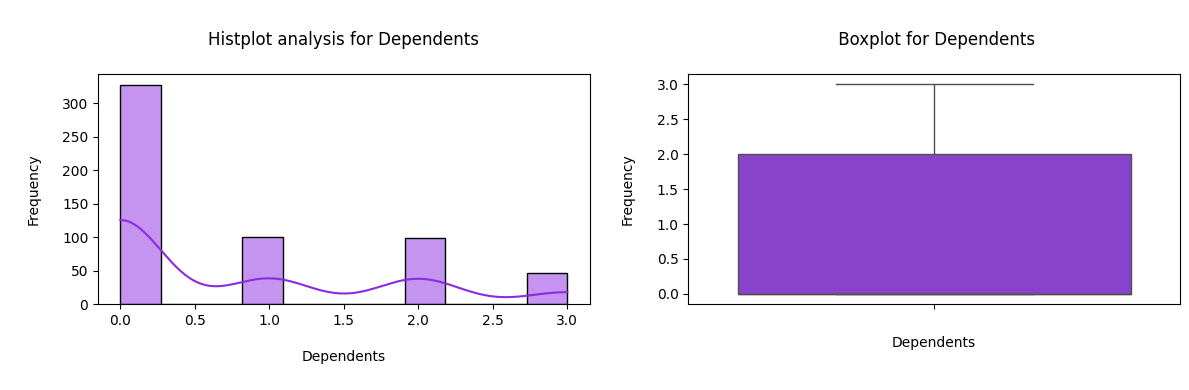

Dependents feature skewness: 0.963
Dependents feature kurtosis: -0.440
Dependents values set are Moderately skewed
--------------------------------------------------------------------------------

 Analysis for ApplicantIncome


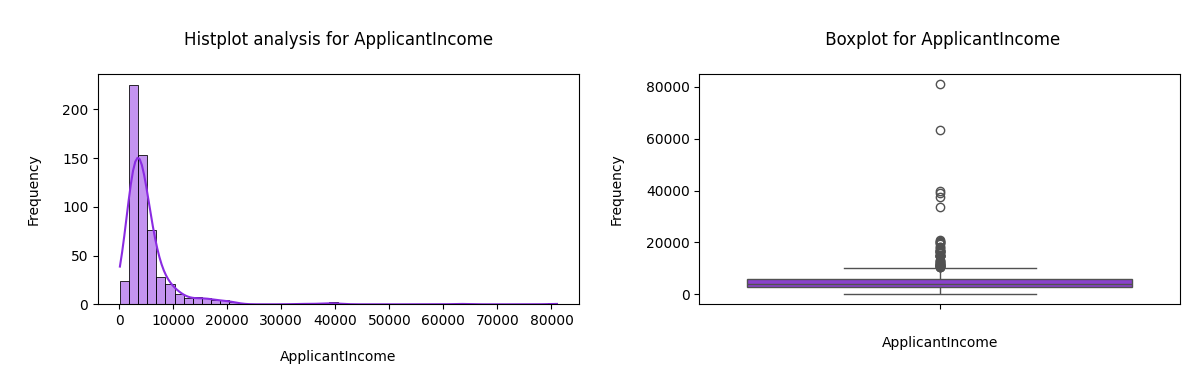

ApplicantIncome feature skewness: 6.868
ApplicantIncome feature kurtosis: 68.292
ApplicantIncome values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for CoapplicantIncome


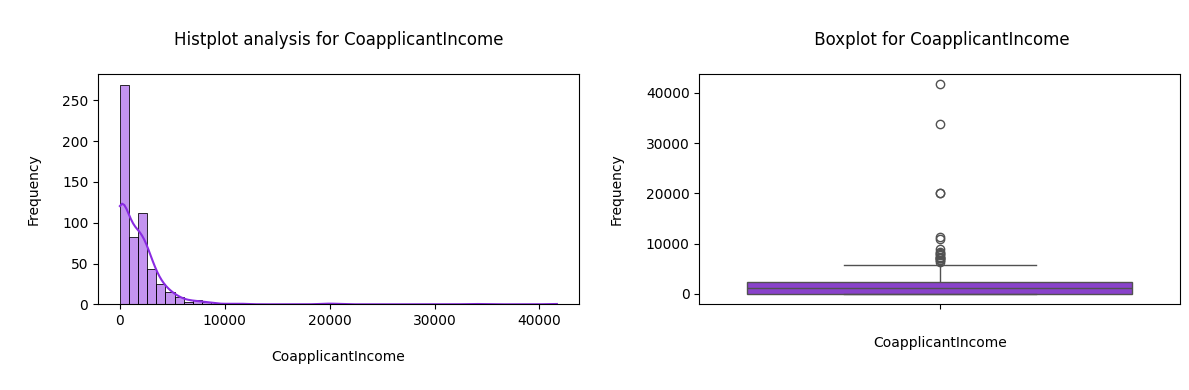

CoapplicantIncome feature skewness: 7.421
CoapplicantIncome feature kurtosis: 82.046
CoapplicantIncome values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for LoanAmount


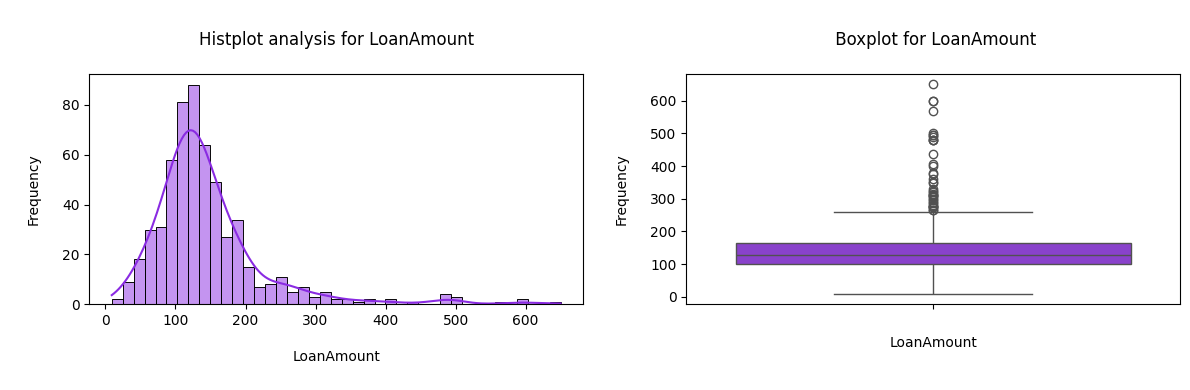

LoanAmount feature skewness: 2.531
LoanAmount feature kurtosis: 9.355
LoanAmount values set are highly skewed
--------------------------------------------------------------------------------

 Analysis for Loan_Amount_Term


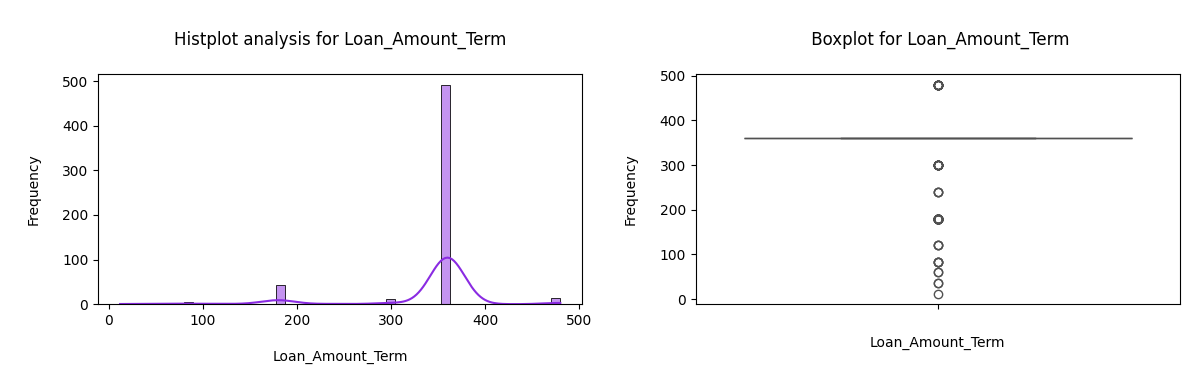

Loan_Amount_Term feature skewness: -2.425
Loan_Amount_Term feature kurtosis: 6.828
Loan_Amount_Term values set are Slightly skewed

--------------------------------------------------------------------------------

 Analysis for Credit_History


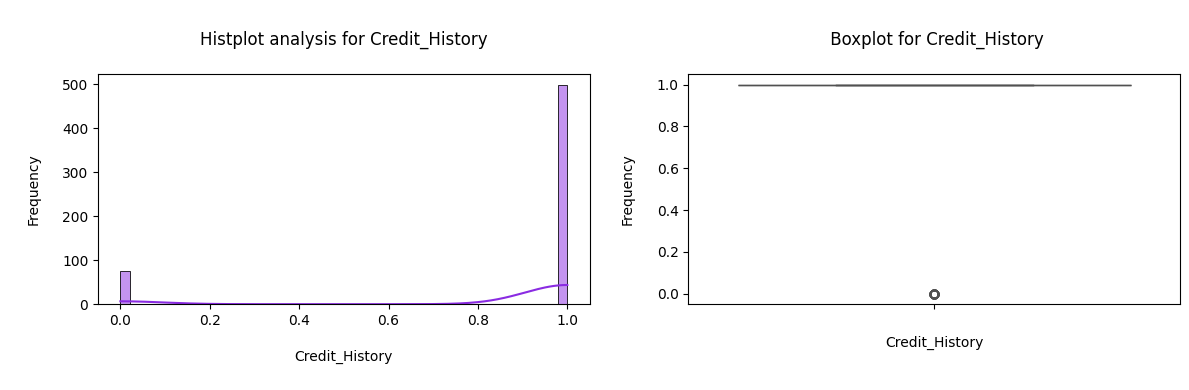

Credit_History feature skewness: -2.194
Credit_History feature kurtosis: 2.826
Credit_History values set are Slightly skewed



In [901]:
for feature in num_features:
    num_univariate_analysis(num_features, feature)

#### categorical

In [902]:
def cat_univariate_analysis(df, feature):
    

    print("--"*40)
    print(f"\n Analysis for {feature}")
    print("=="*40)
    
    

    plt.figure(figsize=(12, 4))
    plt.subplot(1,2,1)
    sns.countplot(x=feature, data=df, color="blueviolet")
    plt.title(f"\nCountplot for {feature}\n")
    plt.xlabel(f"\n{feature}\n")
    plt.ylabel(f"\nFrequency\n")


    counts = df[feature].value_counts()
    plt.subplot(1,2,2)
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"\nPie chart for {feature}\n")
    plt.xlabel(f"\n{feature}\n")

    plt.tight_layout()
    plt.show()






--------------------------------------------------------------------------------

 Analysis for Gender


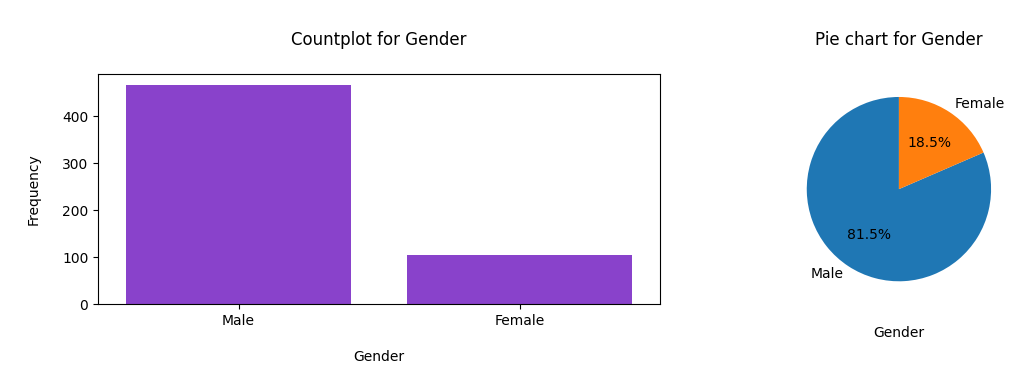

--------------------------------------------------------------------------------

 Analysis for Married


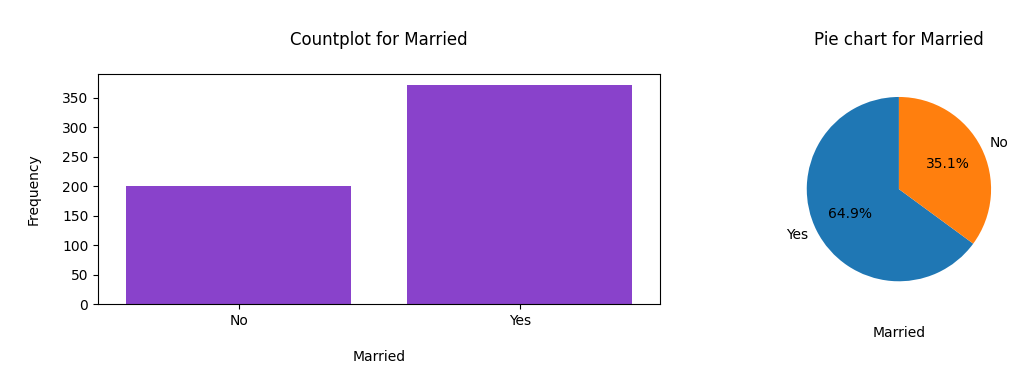

--------------------------------------------------------------------------------

 Analysis for Education


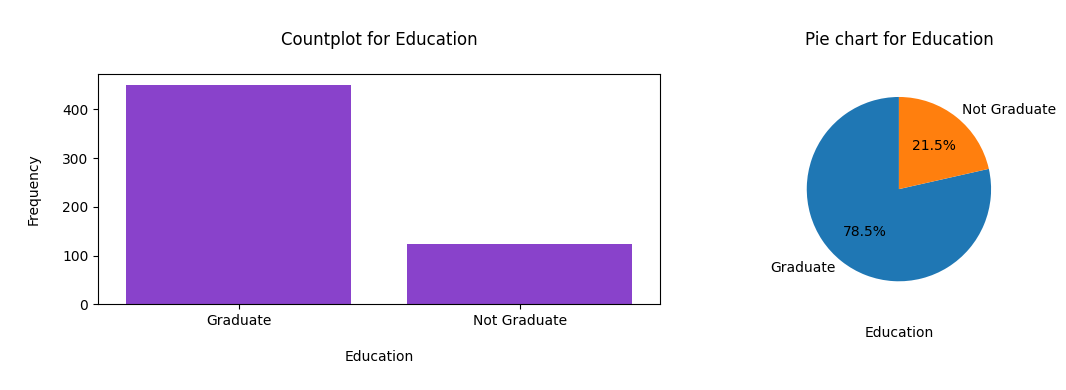

--------------------------------------------------------------------------------

 Analysis for Self_Employed


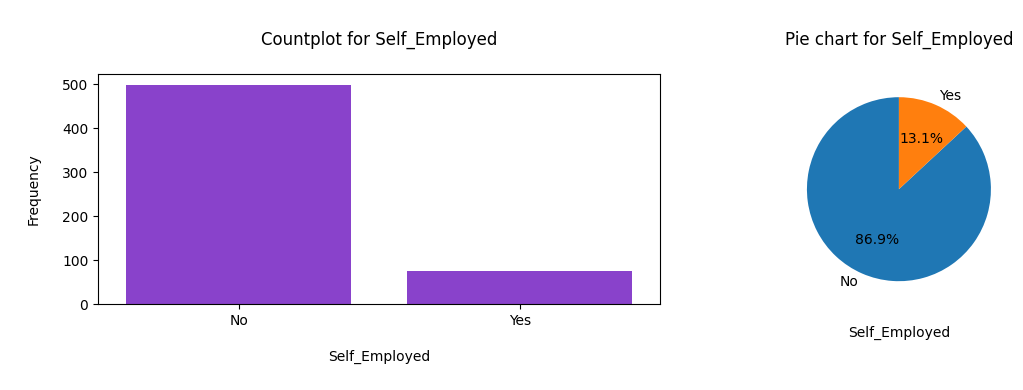

--------------------------------------------------------------------------------

 Analysis for Property_Area


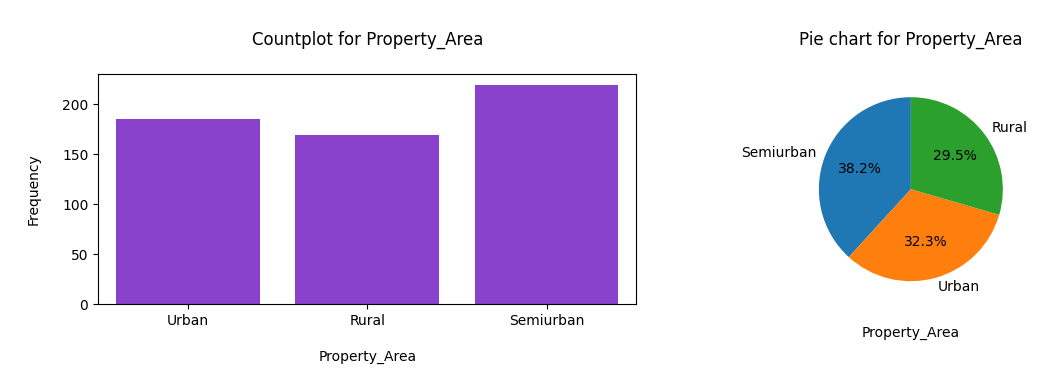

--------------------------------------------------------------------------------

 Analysis for Loan_Status


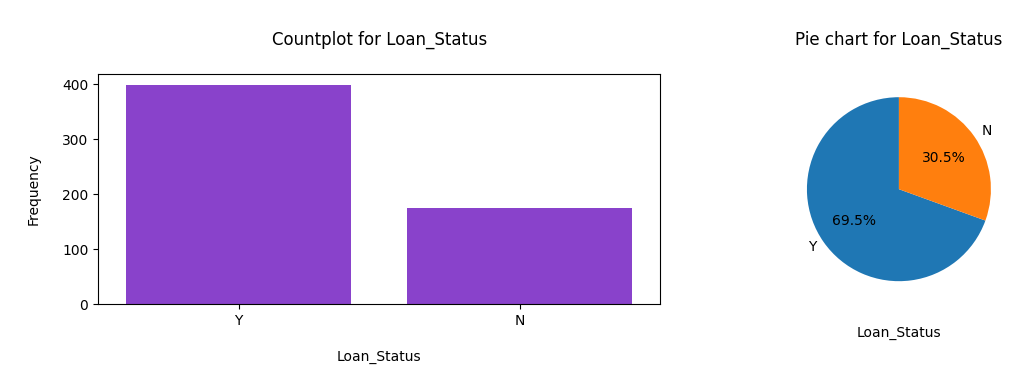

--------------------------------------------------------------------------------

 Analysis for income_rating


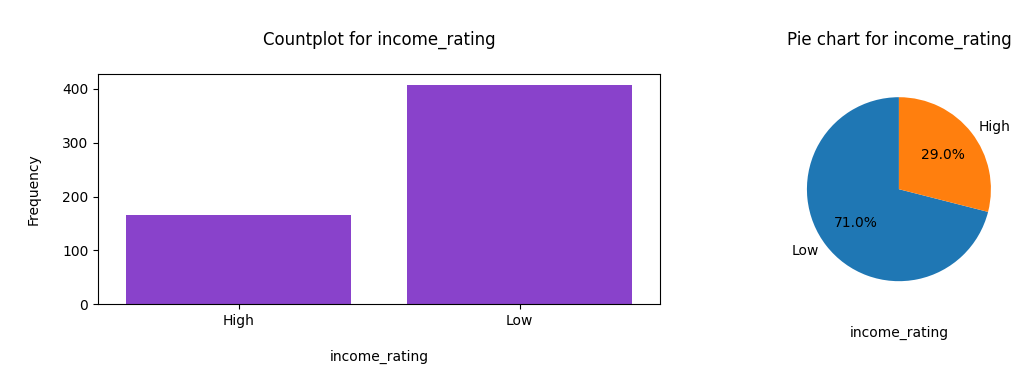

In [903]:
for feature in cat_features:
    cat_univariate_analysis(cat_features, feature)

## Bivariate Analysis

In [904]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_rating
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.001808,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,Low


In [905]:
def bivariate_analysis_pipeline_categorical(df, feature, hue):
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")
    plt.title(label=f"\nCount plot showing relationship between {feature} and Loan Status\n ")
    plt.xlabel(f"\n{feature}")
    plt.ylabel("Frequency")
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17788\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


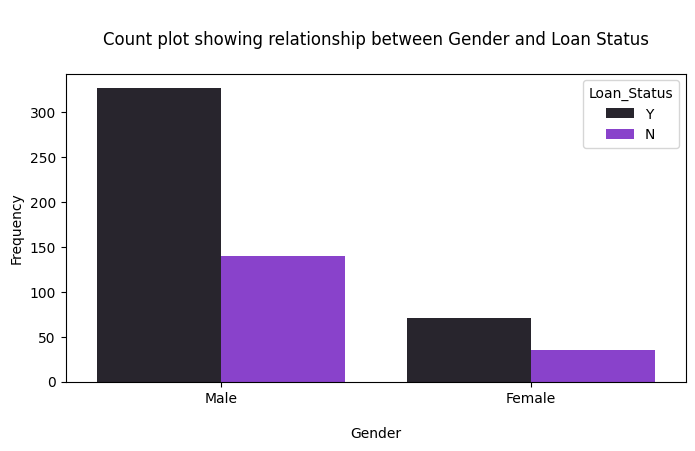

C:\Users\USER\AppData\Local\Temp\ipykernel_17788\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


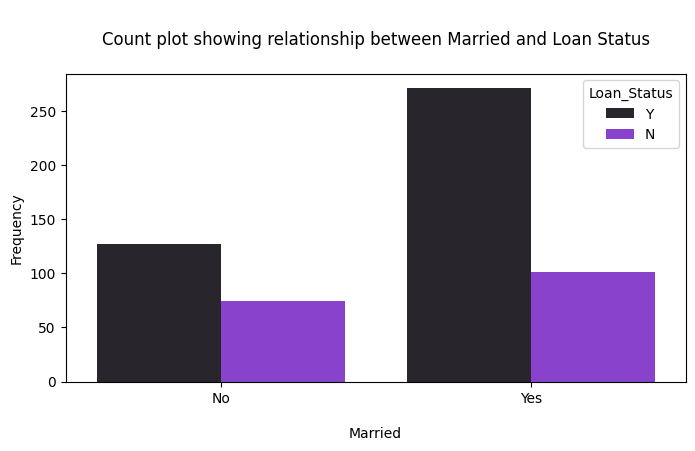

C:\Users\USER\AppData\Local\Temp\ipykernel_17788\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


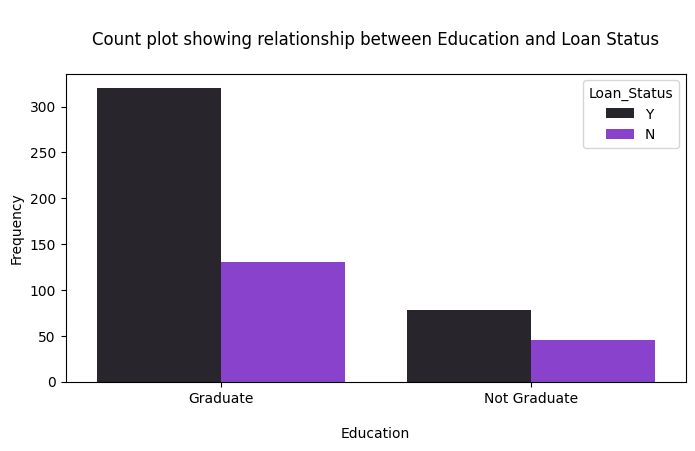

C:\Users\USER\AppData\Local\Temp\ipykernel_17788\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


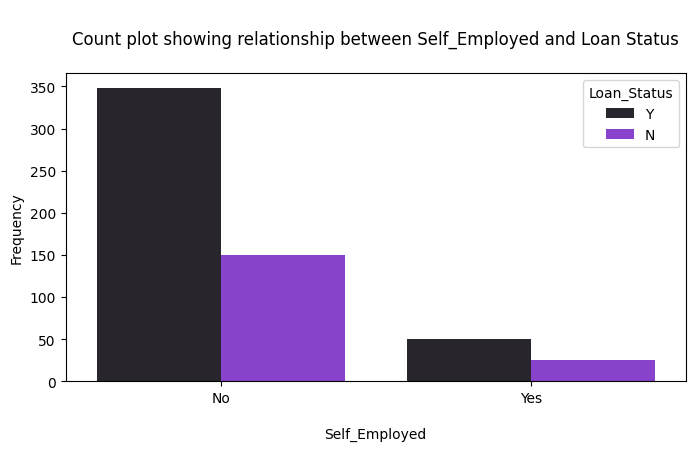

C:\Users\USER\AppData\Local\Temp\ipykernel_17788\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


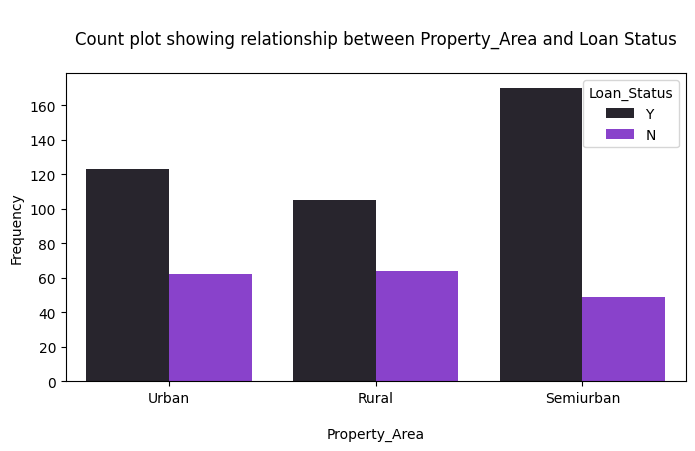

C:\Users\USER\AppData\Local\Temp\ipykernel_17788\235663319.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blueviolet'` for the same effect.

  sns.countplot(x=feature, hue=hue, data=df, color="blueviolet")


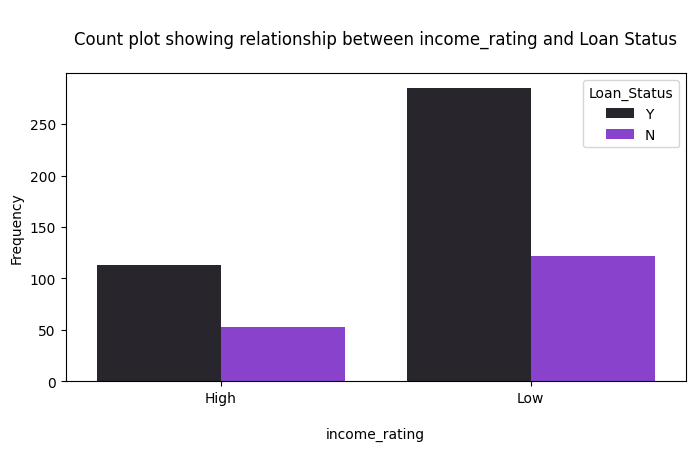

In [906]:




for feature in cat_features.drop(columns=["Loan_Status"]):
    hue = df["Loan_Status"]
    bivariate_analysis_pipeline_categorical(cat_features, feature, hue)





### Correlation with target

In [907]:
def numerify(x):
    if x == 'Y':
        return 1
    else: 
        return 0
    
df["loan_status_label"] = df["Loan_Status"].apply(numerify)
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_rating,loan_status_label
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.001808,360.0,1.0,Urban,Y,High,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,Low,0


In [908]:
def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")
    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)
    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()
    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)







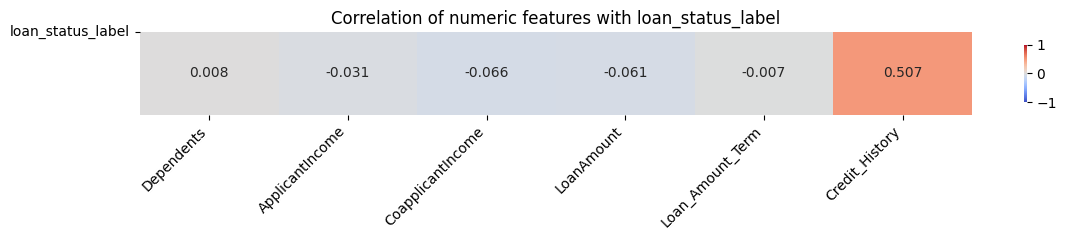

Credit_History       0.506605
CoapplicantIncome   -0.065543
LoanAmount          -0.060706
ApplicantIncome     -0.030596
Dependents           0.007797
Loan_Amount_Term    -0.007145
dtype: float64


In [909]:
corr_series = correlation_with_target(df, "loan_status_label", figsize=(12, 2.5))
print(corr_series)

### Numeric Bivariate

In [910]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df[x_col], df[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


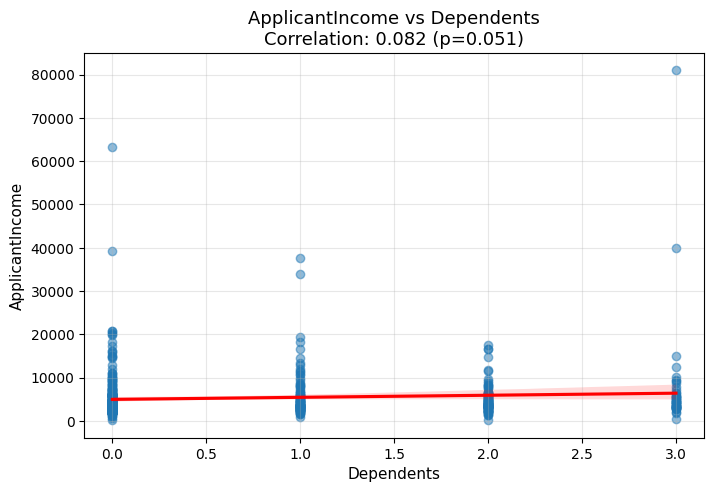

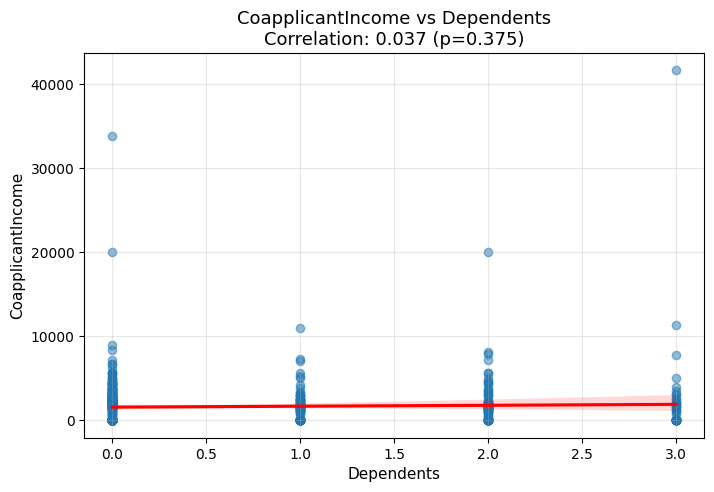

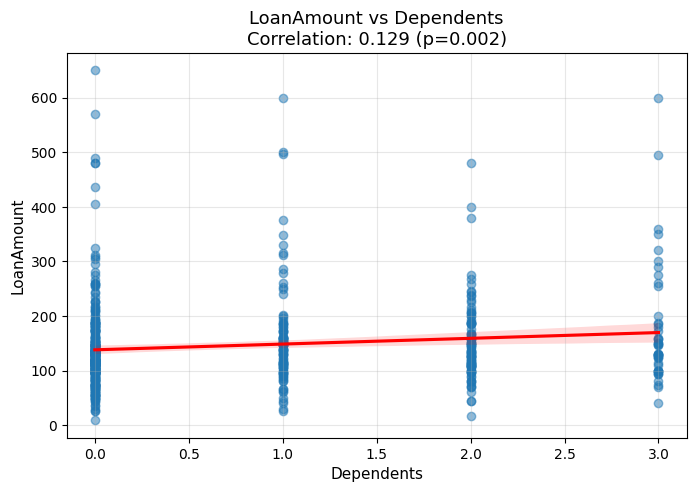

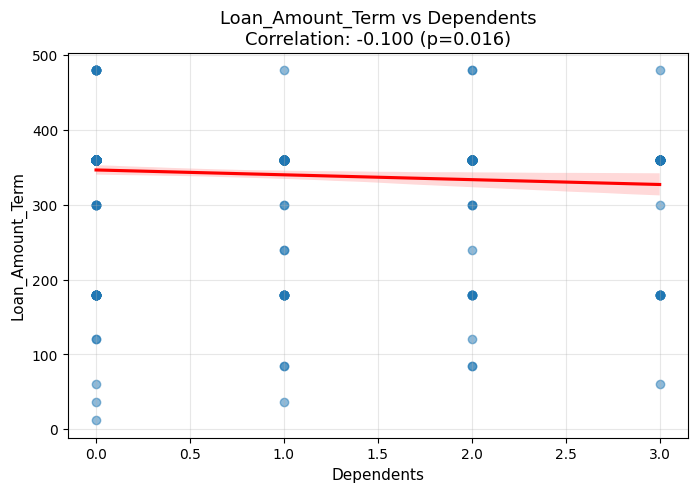

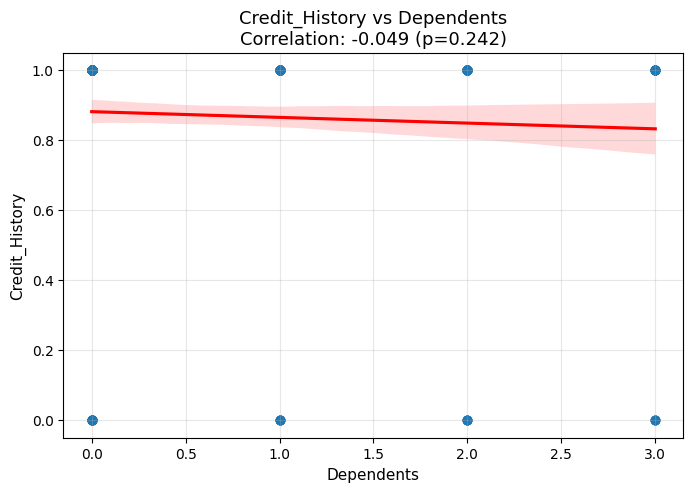

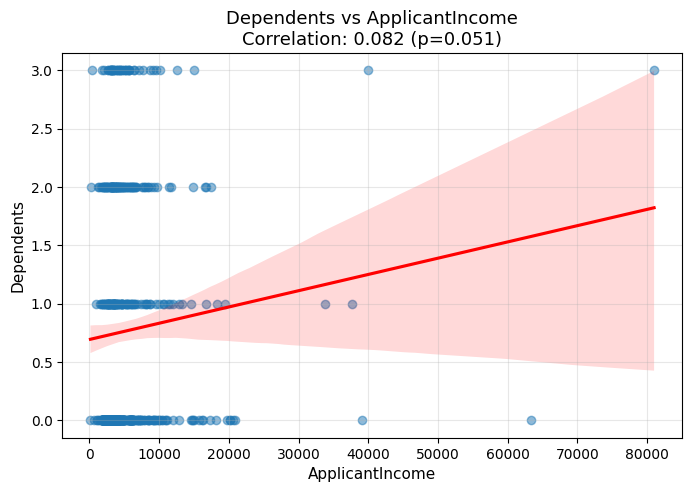

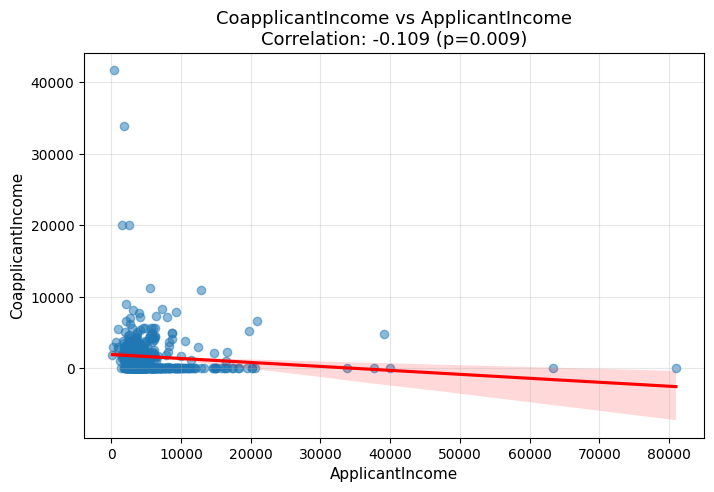

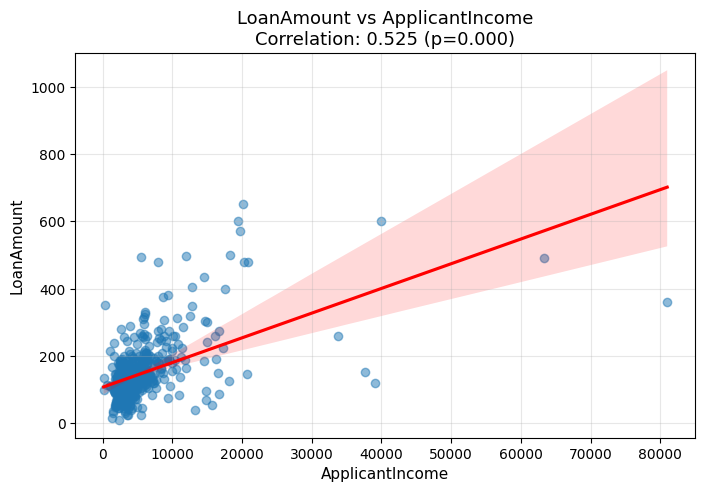

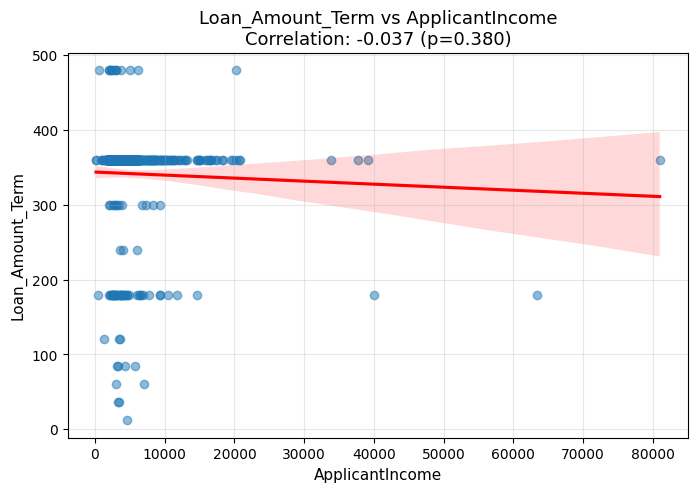

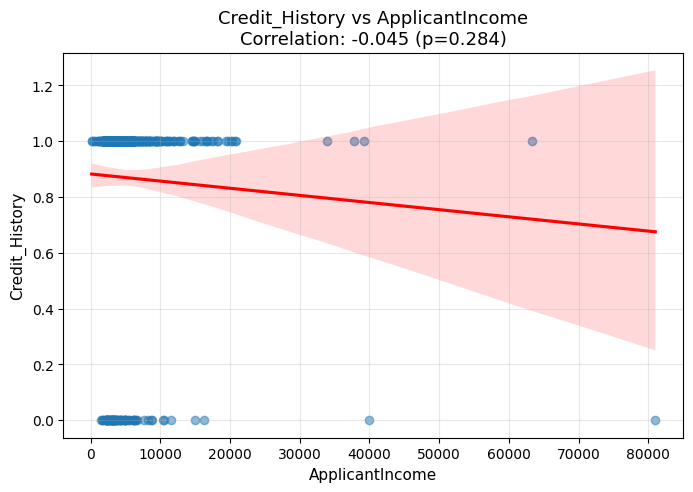

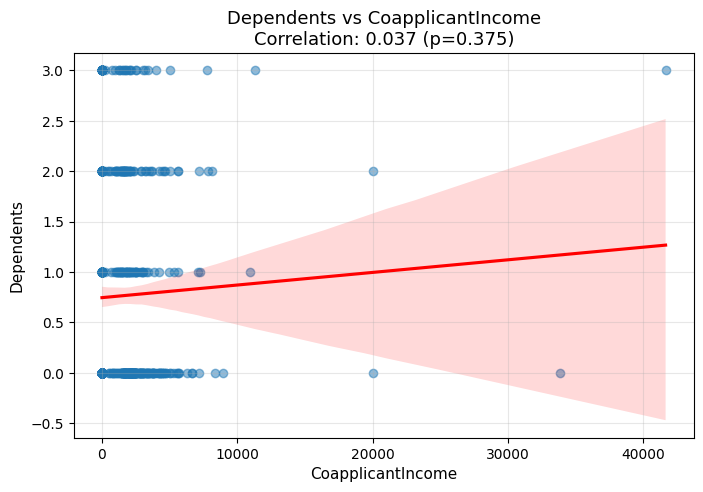

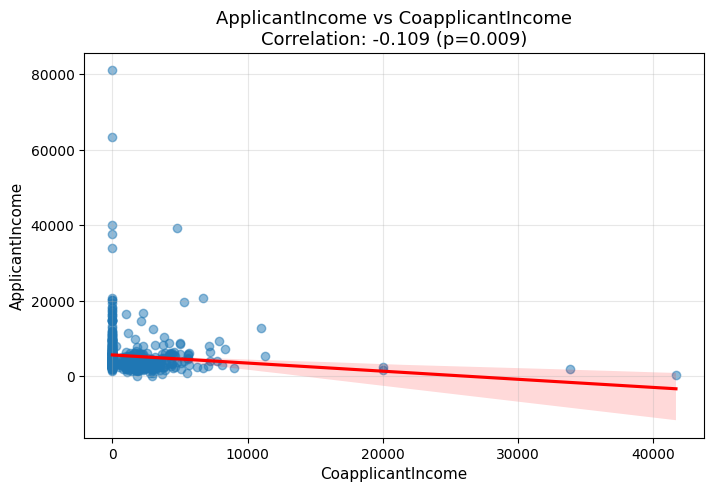

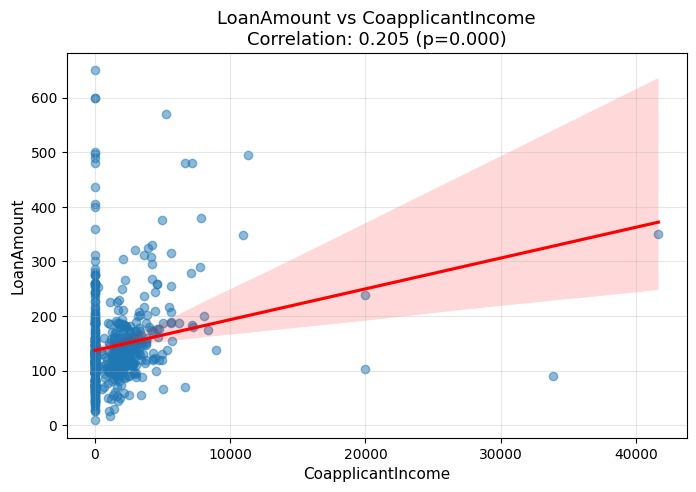

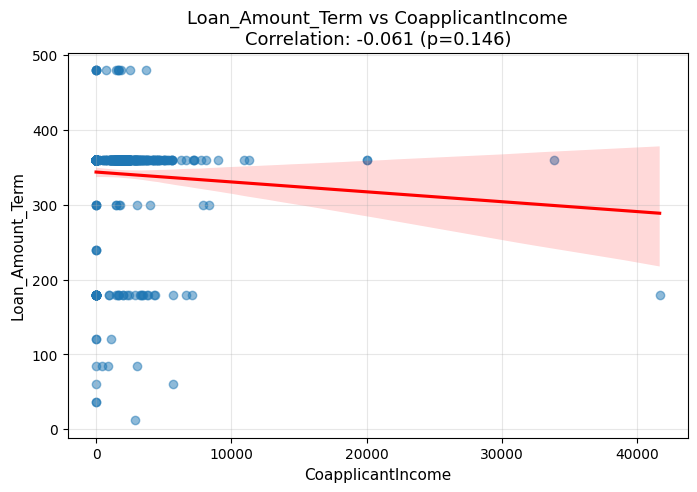

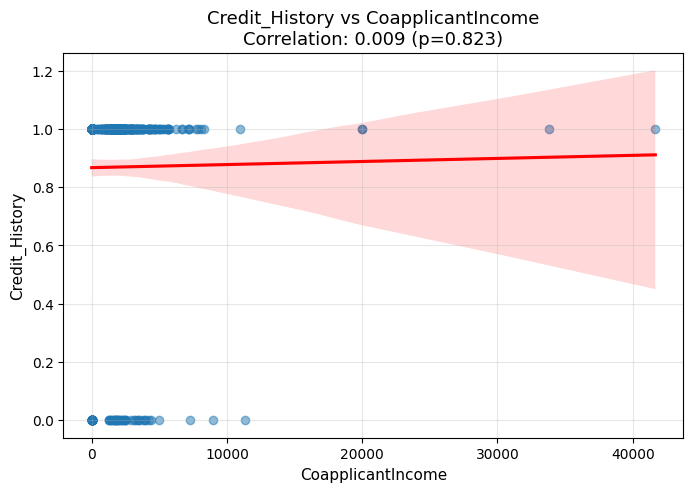

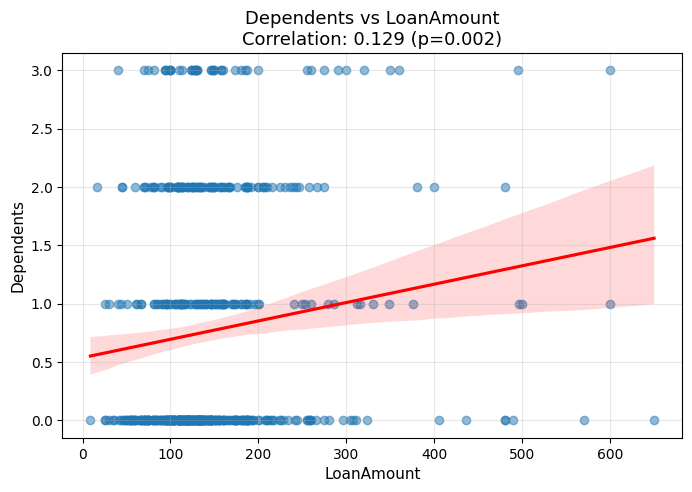

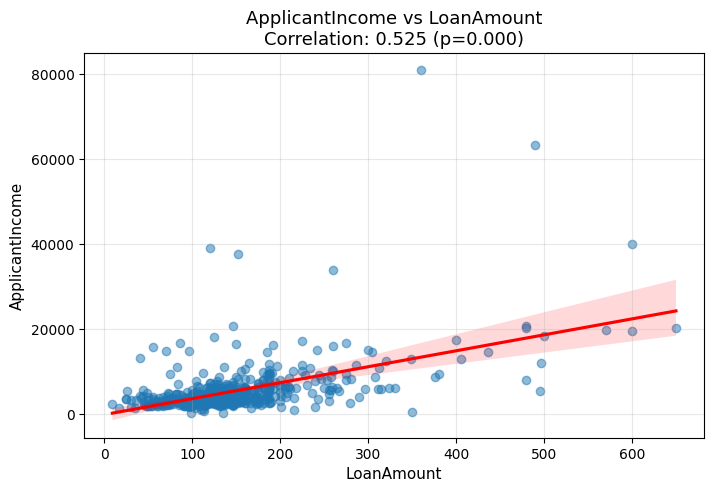

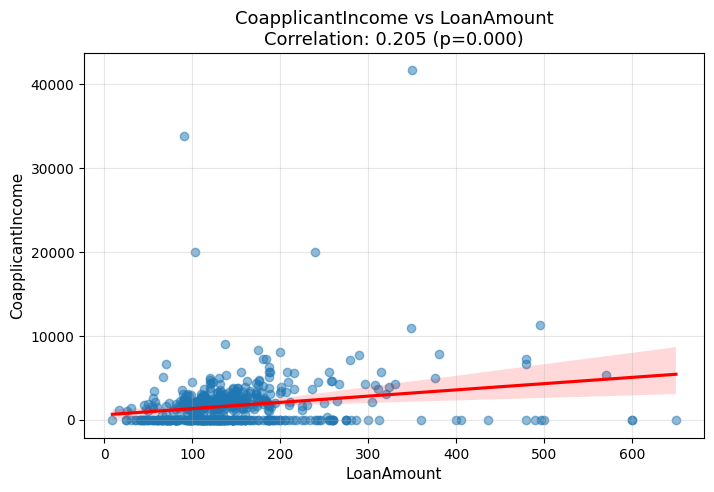

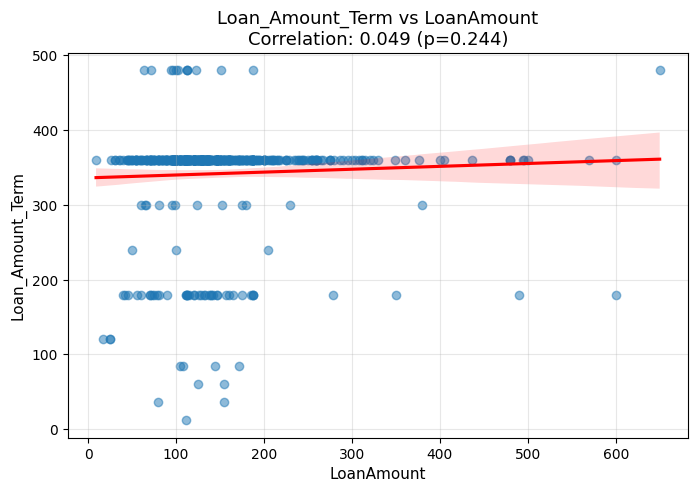

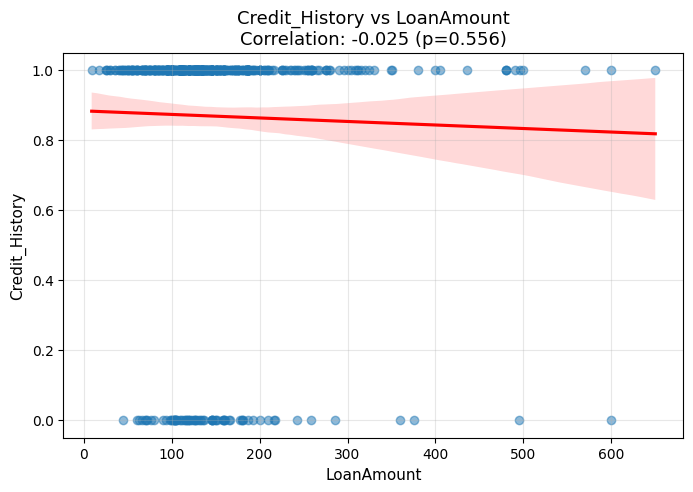

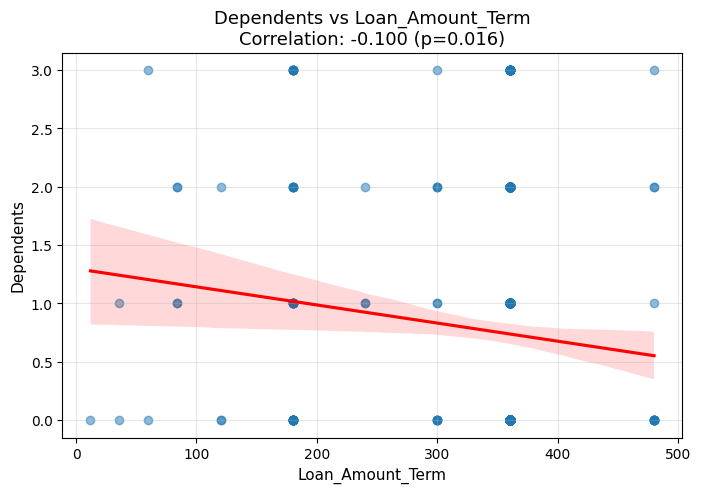

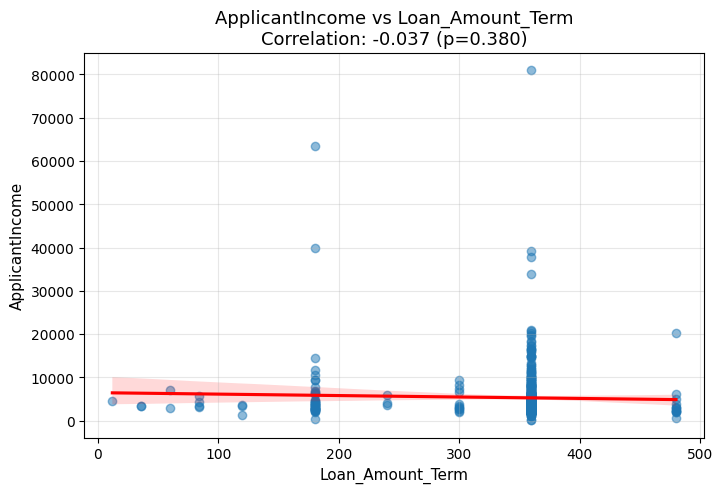

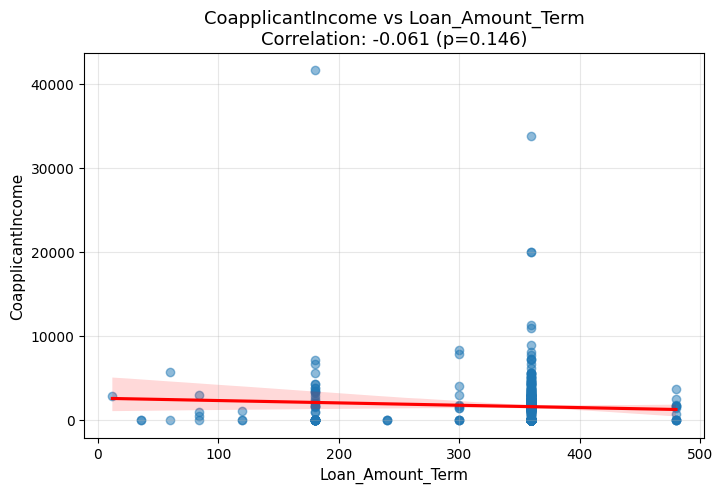

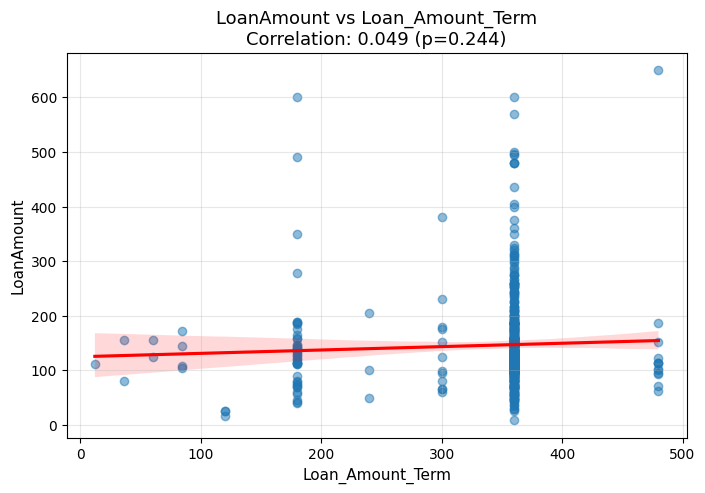

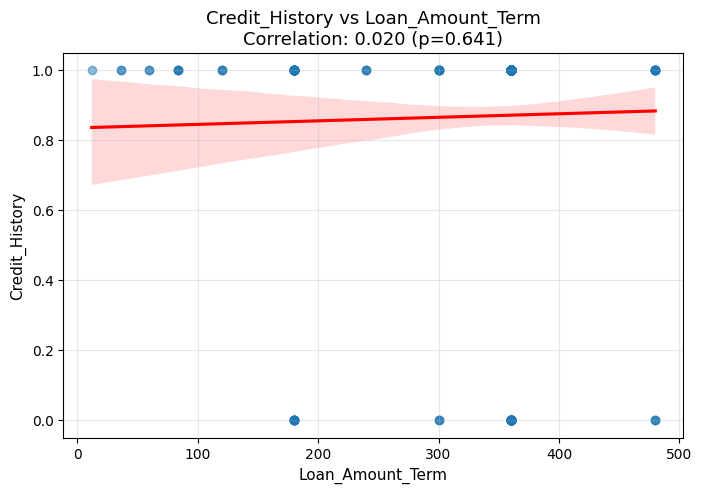

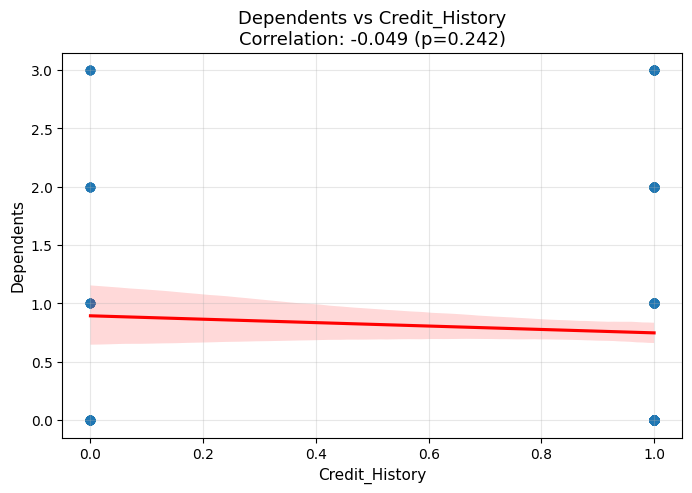

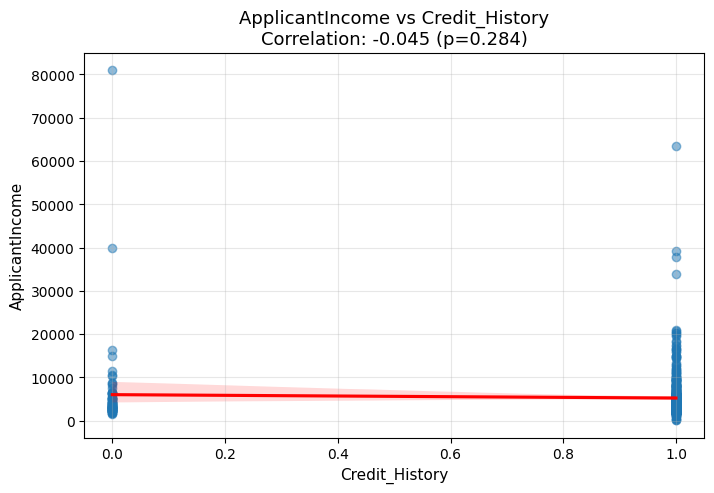

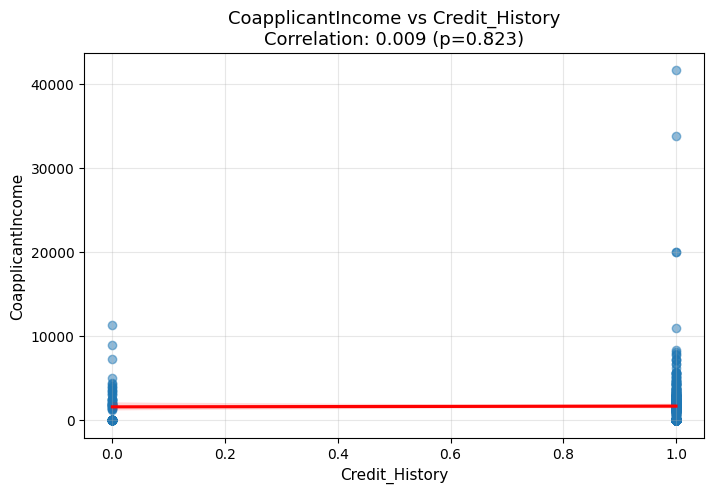

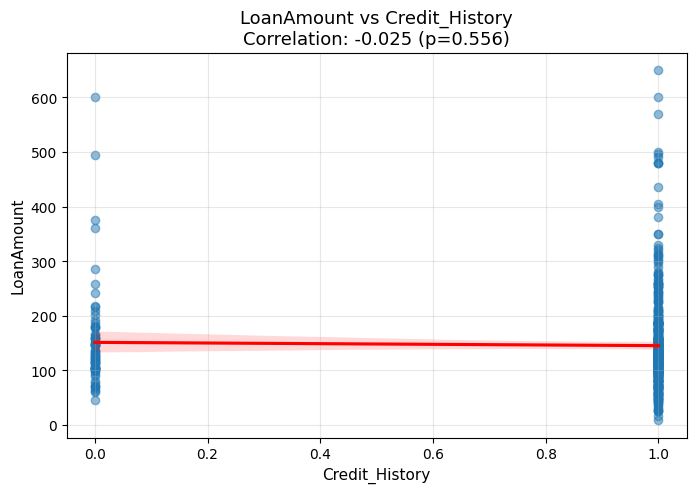

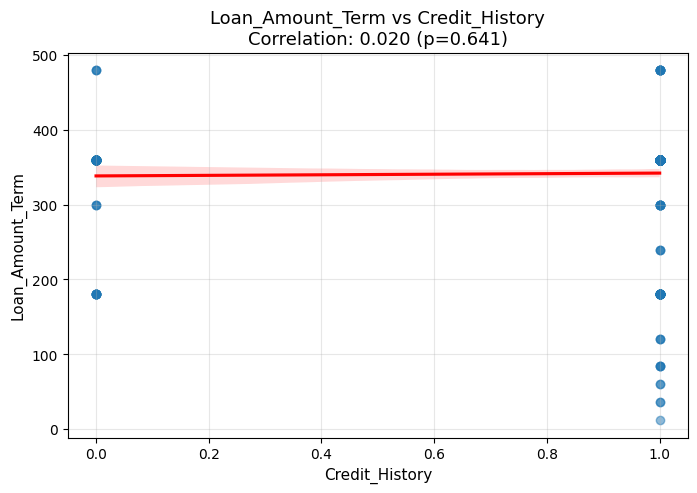

In [911]:
for feature in num_features:
    for feature2 in num_features:
        if feature != feature2:
            numeric_bivariate_plot(num_features, feature, feature2)

### Categorical Bivariate

In [912]:
def bivariate_num_cat(df, feature, target='quality_label'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

    


 Feature: Dependents vs Gender
            mean       std  min  max
Gender                              
Female  0.396226  0.739102  0.0  3.0
Male    0.850107  1.043586  0.0  3.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


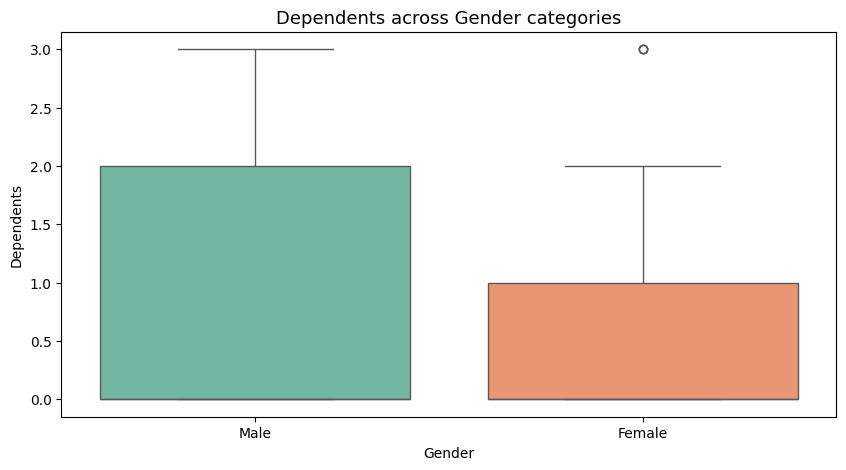

 Feature: Dependents vs Married
             mean       std  min  max
Married                              
No       0.283582  0.681307  0.0  3.0
Yes      1.026882  1.061113  0.0  3.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


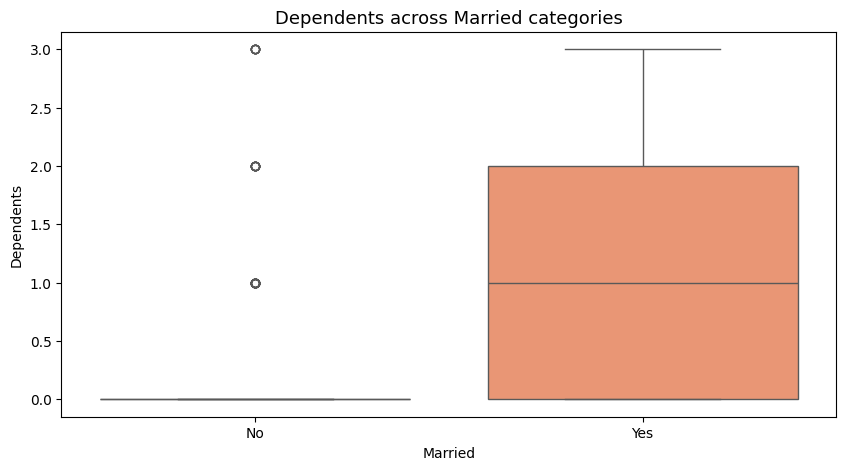

 Feature: Dependents vs Education
                  mean       std  min  max
Education                                 
Graduate      0.733333  0.987675  0.0  3.0
Not Graduate  0.886179  1.080401  0.0  3.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


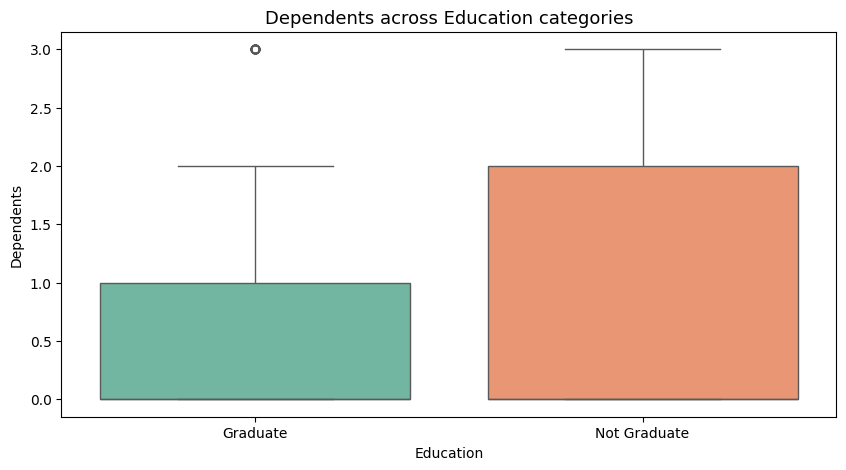

 Feature: Dependents vs Self_Employed
                   mean       std  min  max
Self_Employed                              
No             0.742972  1.010110  0.0  3.0
Yes            0.920000  0.996751  0.0  3.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


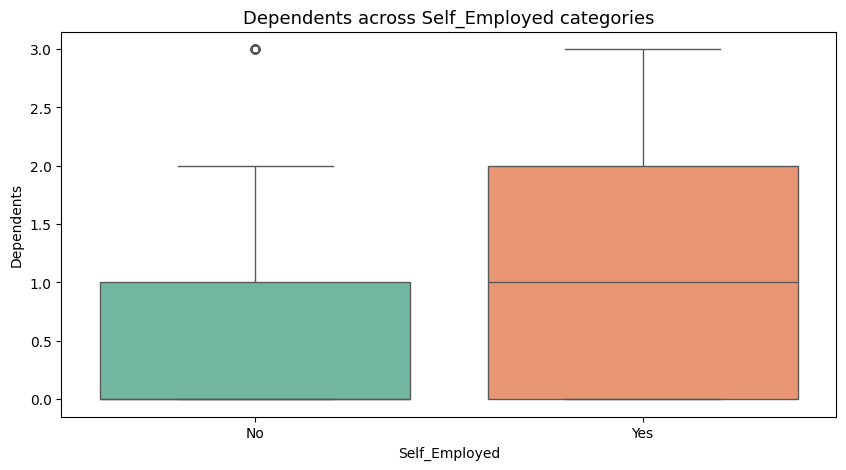

 Feature: Dependents vs Property_Area
                   mean       std  min  max
Property_Area                              
Rural          0.757396  1.060810  0.0  3.0
Semiurban      0.757991  1.004973  0.0  3.0
Urban          0.783784  0.970632  0.0  3.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


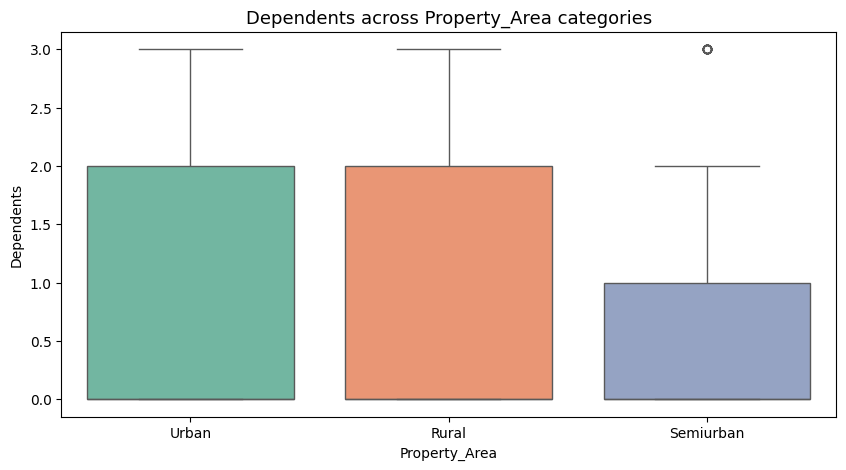

 Feature: Dependents vs income_rating
                   mean       std  min  max
income_rating                              
High           0.867470  1.035972  0.0  3.0
Low            0.724816  0.996520  0.0  3.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


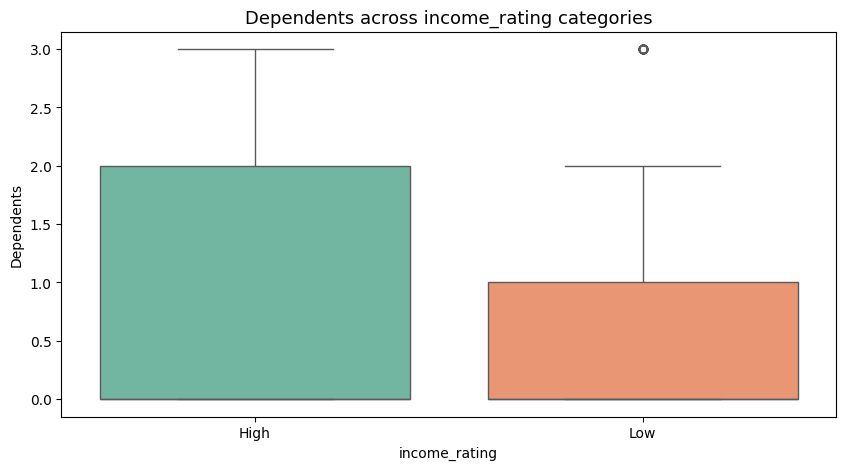

 Feature: ApplicantIncome vs Gender
               mean          std    min      max
Gender                                          
Female  4648.632075  3630.167466  210.0  19484.0
Male    5482.835118  6305.954188  150.0  81000.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


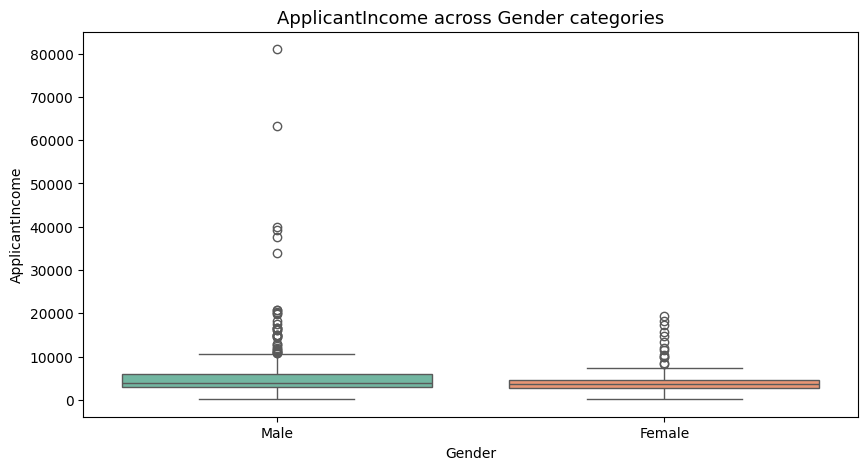

 Feature: ApplicantIncome vs Married
                mean          std    min      max
Married                                          
No       5022.895522  4091.125063  416.0  37719.0
Yes      5493.647849  6688.679609  150.0  81000.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


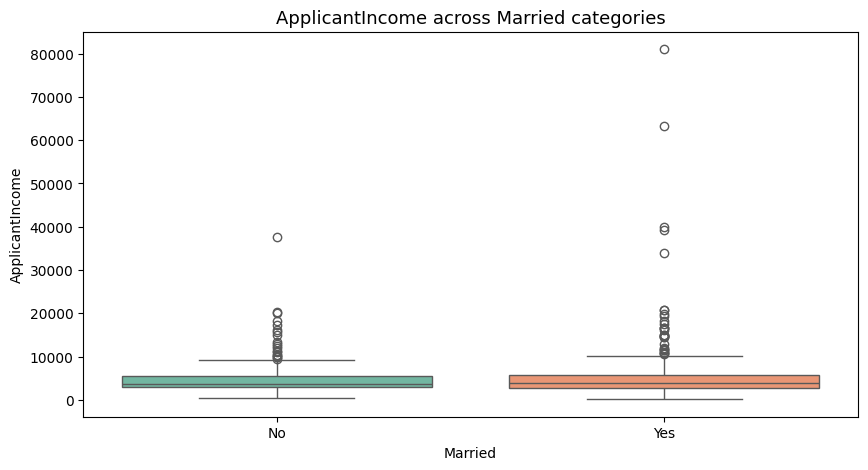

 Feature: ApplicantIncome vs Education
                     mean          std    min      max
Education                                             
Graduate      5745.540000  6497.130331  150.0  81000.0
Not Graduate  3802.813008  2319.306208  210.0  18165.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


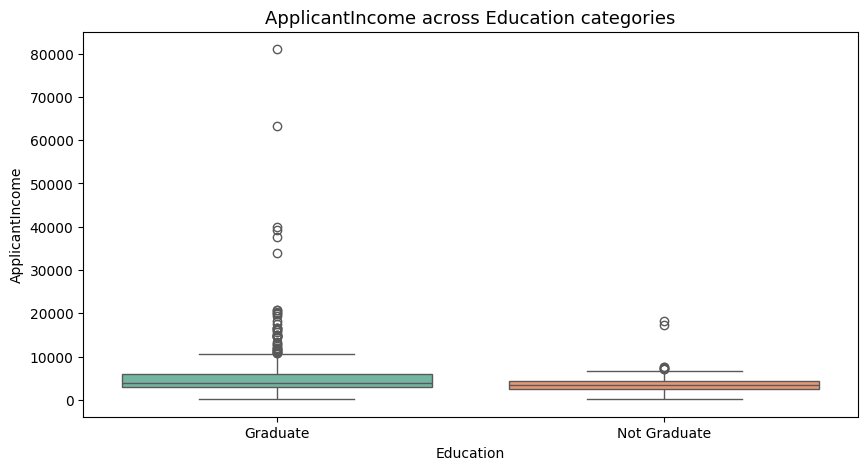

 Feature: ApplicantIncome vs Self_Employed
                      mean         std     min      max
Self_Employed                                          
No             4989.742972  5820.48403   150.0  81000.0
Yes            7577.960000  6040.74151  1000.0  39147.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


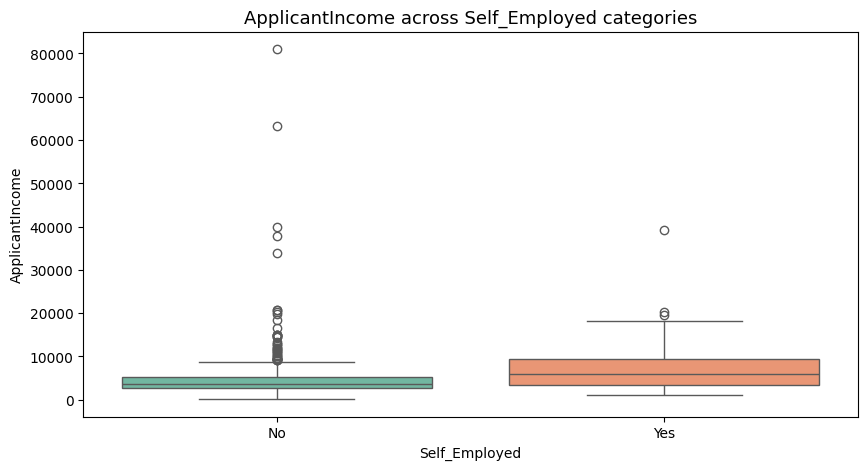

 Feature: ApplicantIncome vs Property_Area
                      mean          std    min      max
Property_Area                                          
Rural          5556.710059  6814.031412  150.0  81000.0
Semiurban      5263.369863  5356.289168  210.0  39999.0
Urban          5197.172973  5665.792361  416.0  63337.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


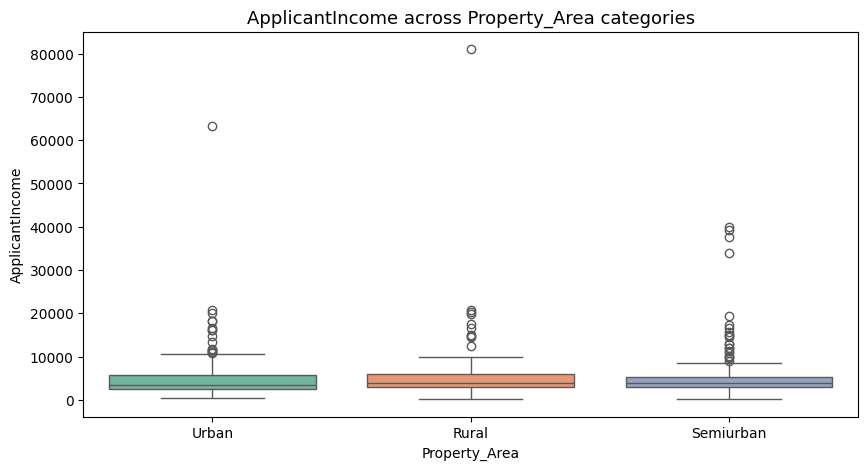

 Feature: ApplicantIncome vs income_rating
                       mean          std     min      max
income_rating                                            
High           10402.939759  9067.557001  5333.0  81000.0
Low             3258.847666   980.201227   150.0   5316.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


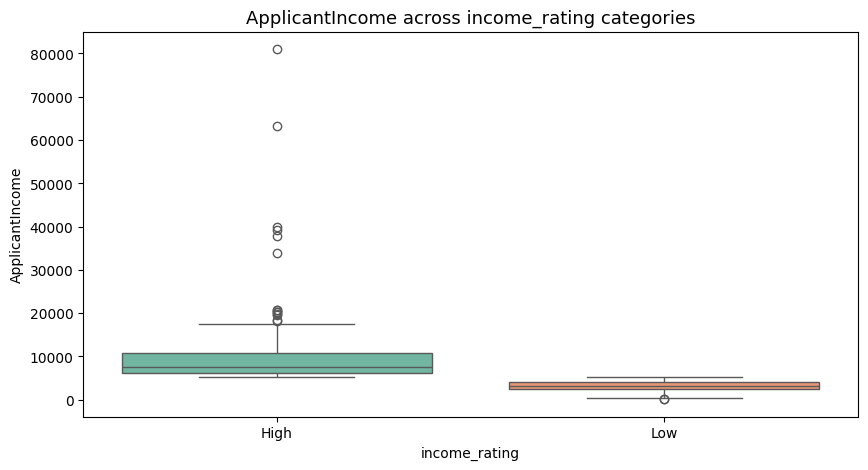

 Feature: CoapplicantIncome vs Gender
               mean          std  min      max
Gender                                        
Female  1148.415094  4201.023199  0.0  41667.0
Male    1753.248223  2647.860749  0.0  33837.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


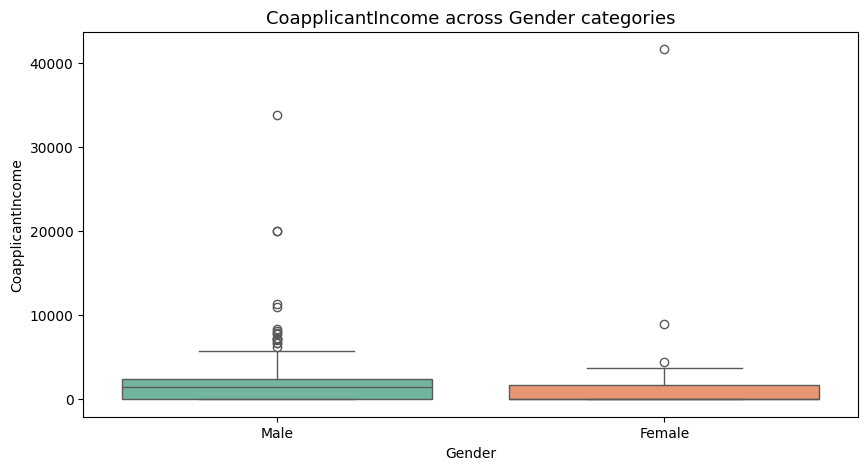

 Feature: CoapplicantIncome vs Married
                mean          std  min      max
Married                                        
No       1370.467662  4206.289957  0.0  41667.0
Yes      1787.728280  2070.597280  0.0  20000.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


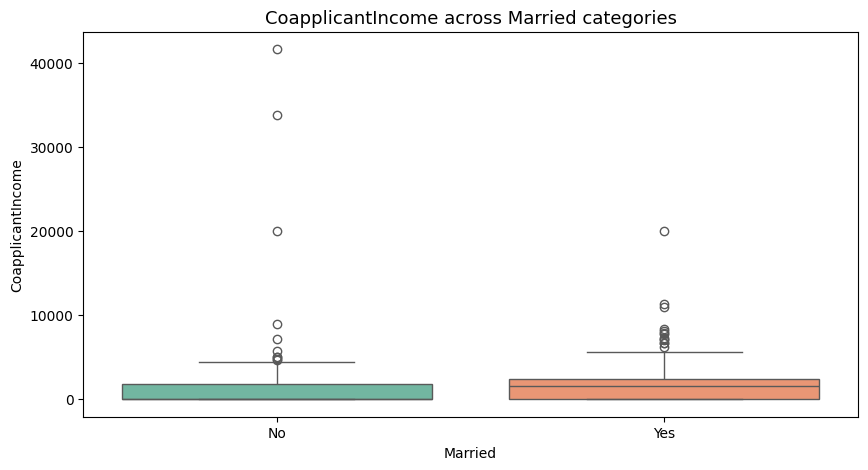

 Feature: CoapplicantIncome vs Education
                     mean          std  min      max
Education                                           
Graduate      1749.368711  3310.720571  0.0  41667.0
Not Graduate  1246.203252  1299.505202  0.0   7101.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


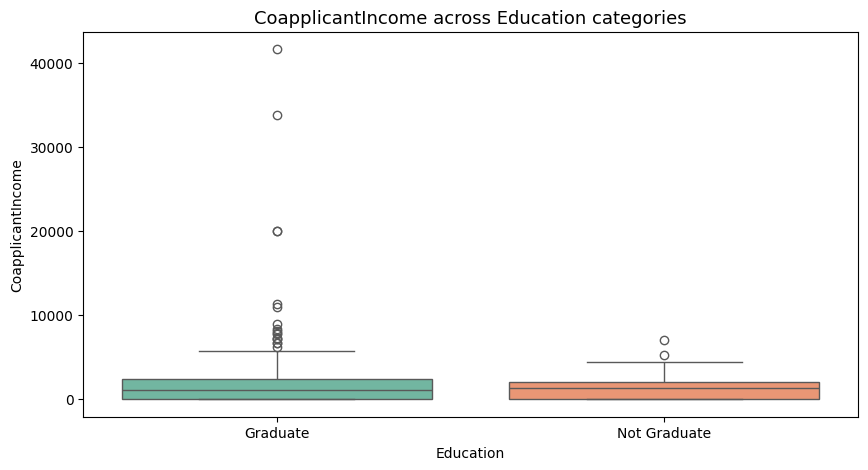

 Feature: CoapplicantIncome vs Self_Employed
                      mean          std  min      max
Self_Employed                                        
No             1672.873333  3028.714892  0.0  41667.0
Yes            1432.106667  2821.476021  0.0  20000.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


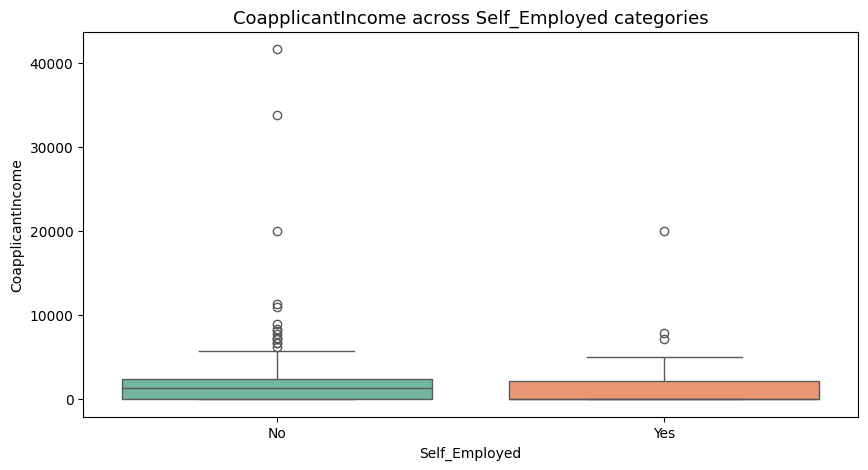

 Feature: CoapplicantIncome vs Property_Area
                      mean          std  min      max
Property_Area                                        
Rural          1595.977041  1784.646538  0.0   8333.0
Semiurban      1538.703196  2287.987461  0.0  20000.0
Urban          1804.339459  4341.446396  0.0  41667.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


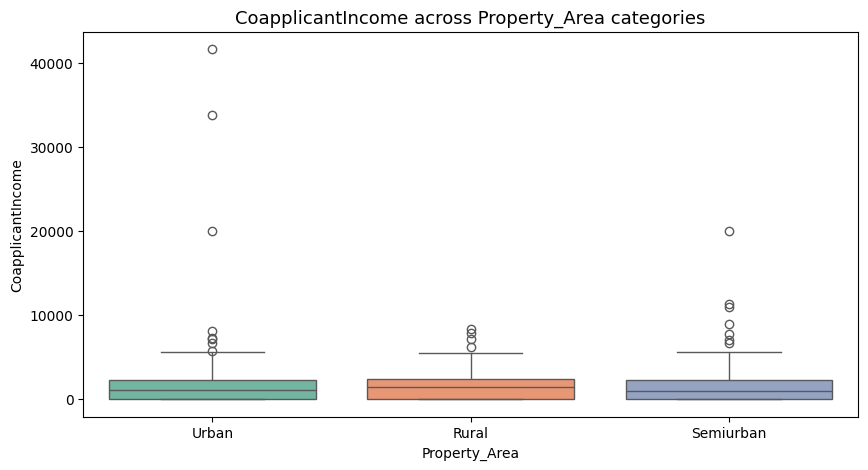

 Feature: CoapplicantIncome vs income_rating
                      mean          std  min      max
income_rating                                        
High           1230.463855  2247.006096  0.0  11300.0
Low            1808.948206  3246.582642  0.0  41667.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


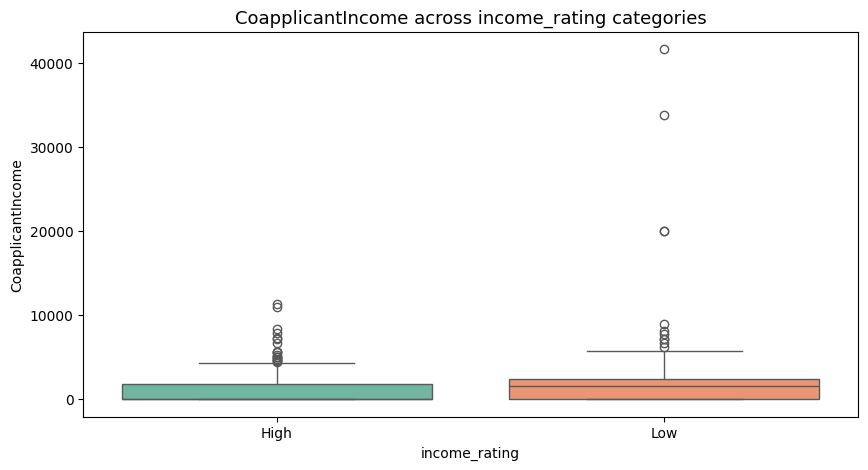

 Feature: LoanAmount vs Gender
              mean        std   min    max
Gender                                    
Female  127.877393  80.203286   9.0  600.0
Male    150.115701  82.628434  17.0  650.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


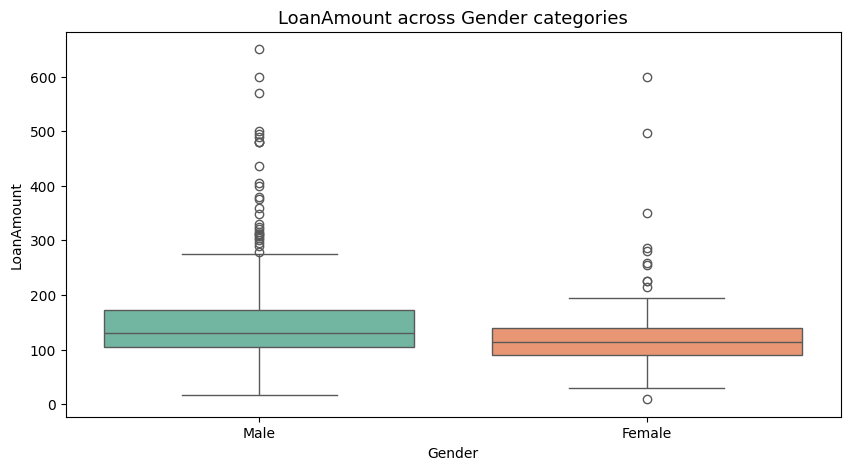

 Feature: LoanAmount vs Married
               mean        std   min    max
Married                                    
No       130.049814  74.079819   9.0  650.0
Yes      154.621031  85.677751  17.0  600.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


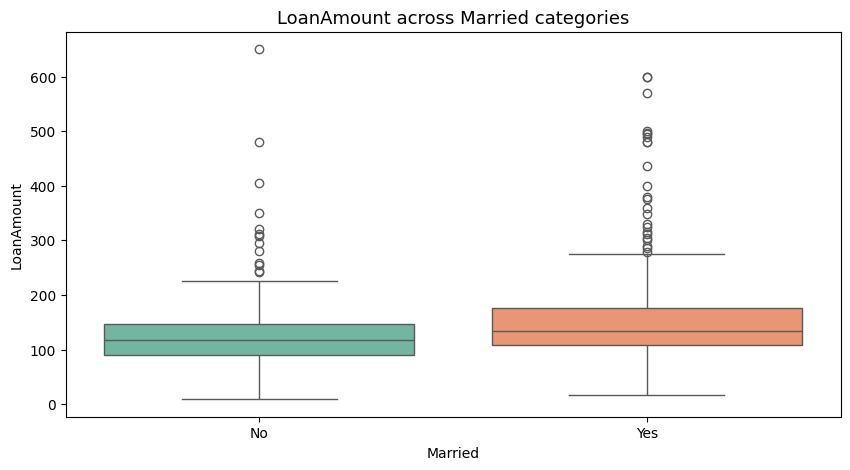

 Feature: LoanAmount vs Education
                    mean        std   min    max
Education                                       
Graduate      153.093386  89.485112   9.0  650.0
Not Graduate  120.057013  40.378055  25.0  279.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


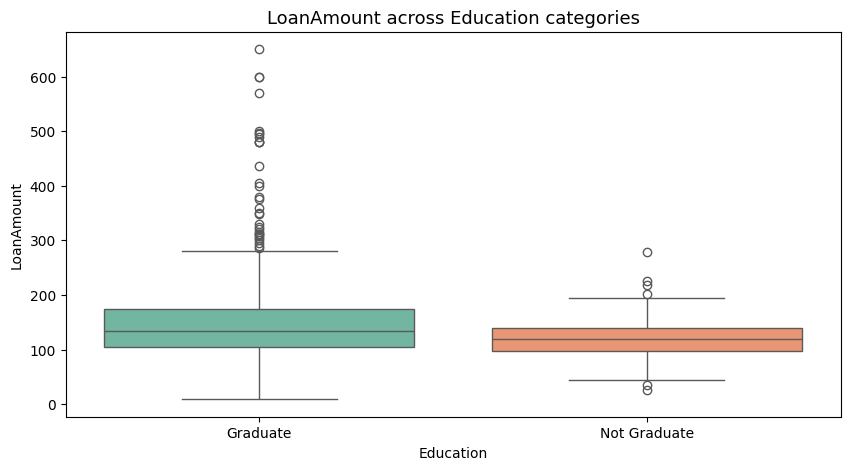

 Feature: LoanAmount vs Self_Employed
                     mean         std   min    max
Self_Employed                                     
No             142.046246   77.038575   9.0  600.0
Yes            172.266739  109.701215  25.0  650.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


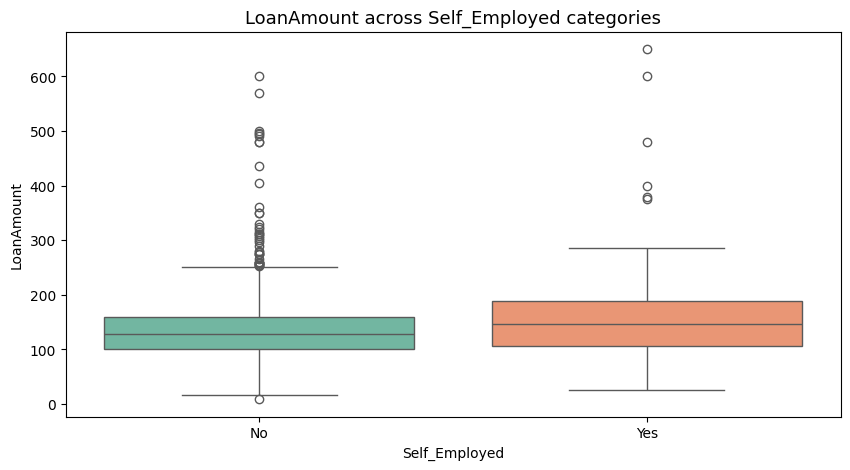

 Feature: LoanAmount vs Property_Area
                     mean        std   min    max
Property_Area                                    
Rural          150.875804  79.219492  40.0  570.0
Semiurban      146.214645  82.209313  25.0  600.0
Urban          141.297395  86.098175   9.0  650.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


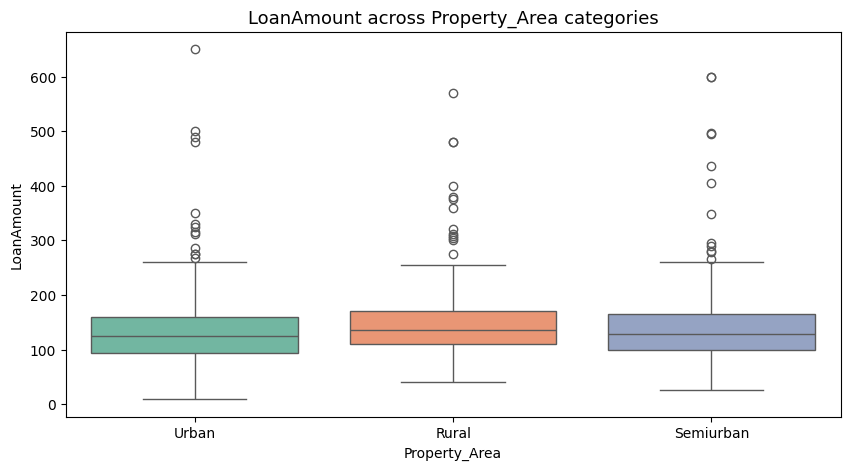

 Feature: LoanAmount vs income_rating
                     mean         std   min    max
income_rating                                     
High           212.530175  113.354476  26.0  650.0
Low            118.867389   42.843233   9.0  350.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


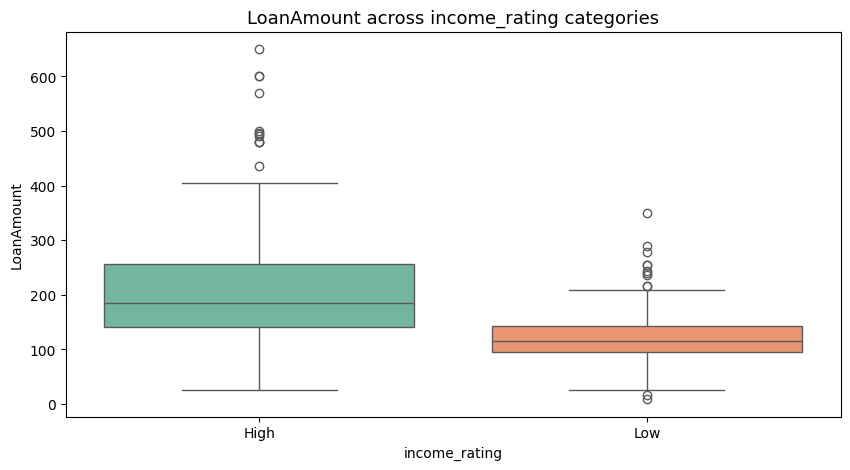

 Feature: Loan_Amount_Term vs Gender
              mean        std   min    max
Gender                                    
Female  353.773585  52.430686  36.0  480.0
Male    338.929336  67.494598  12.0  480.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


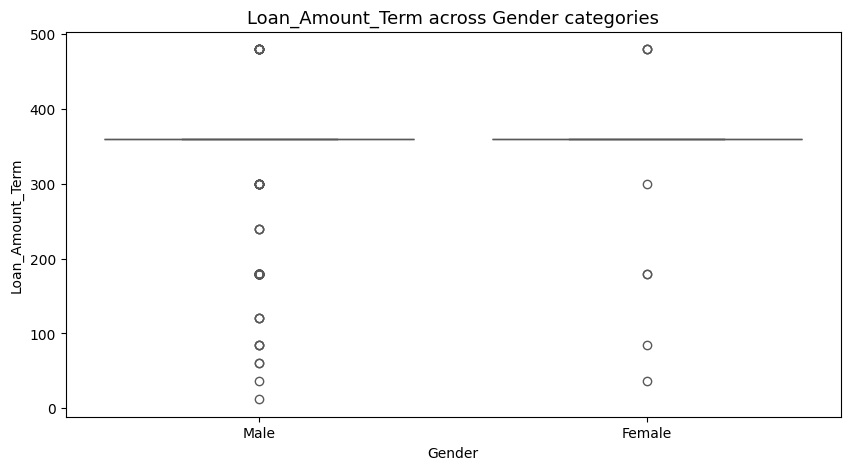

 Feature: Loan_Amount_Term vs Married
               mean        std   min    max
Married                                    
No       351.104478  59.533470  36.0  480.0
Yes      336.580645  67.576024  12.0  480.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


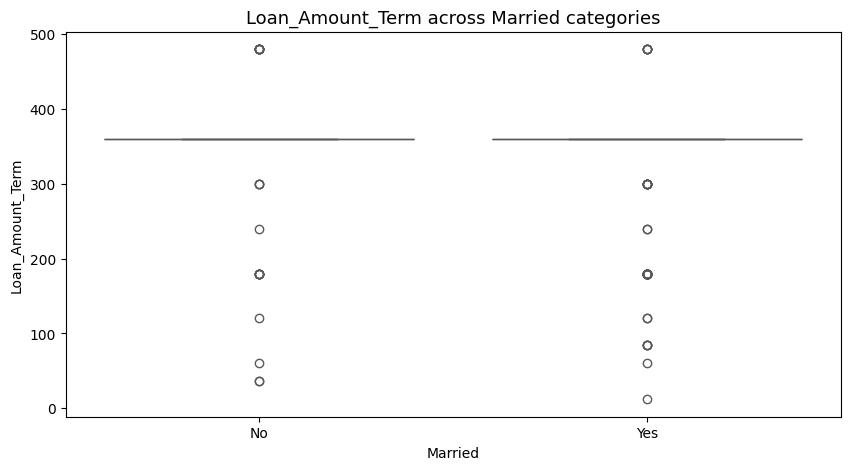

 Feature: Loan_Amount_Term vs Education
                    mean        std   min    max
Education                                       
Graduate      344.586667  60.845511  12.0  480.0
Not Graduate  331.024390  78.432749  36.0  480.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


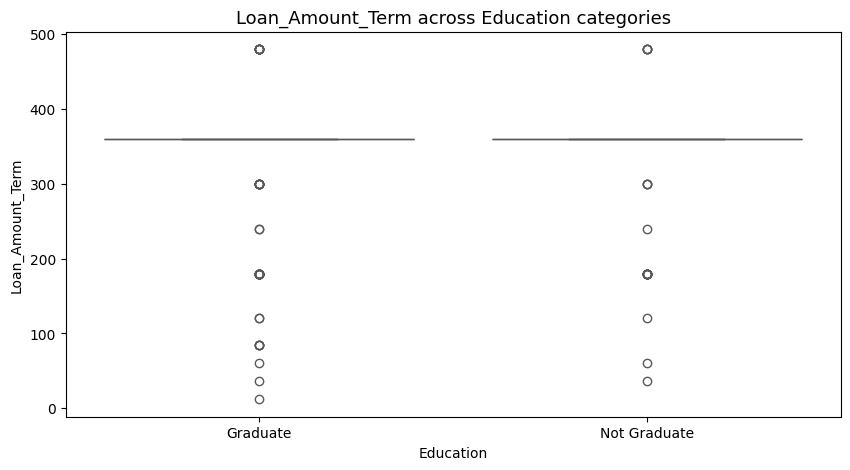

 Feature: Loan_Amount_Term vs Self_Employed
                     mean       std   min    max
Self_Employed                                   
No             342.361446  64.61536  12.0  480.0
Yes            337.120000  69.13695  60.0  480.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


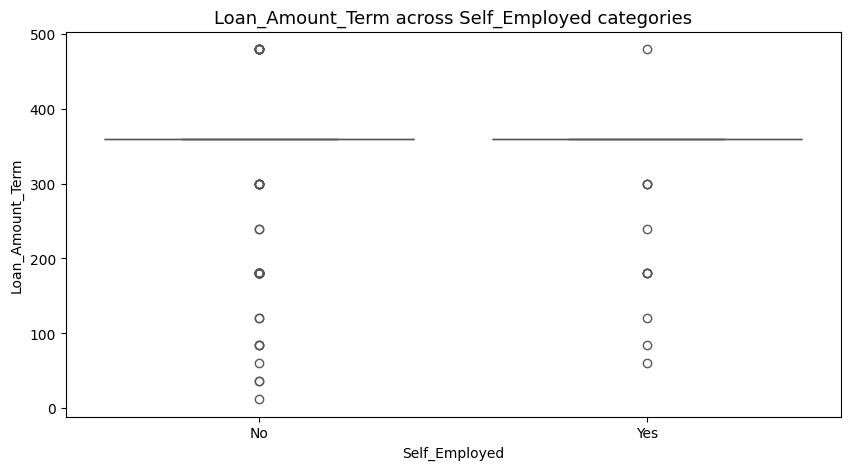

 Feature: Loan_Amount_Term vs Property_Area
                     mean        std   min    max
Property_Area                                    
Rural          345.017751  55.313874  84.0  480.0
Semiurban      346.465753  60.865791  36.0  480.0
Urban          332.951351  76.893792  12.0  480.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


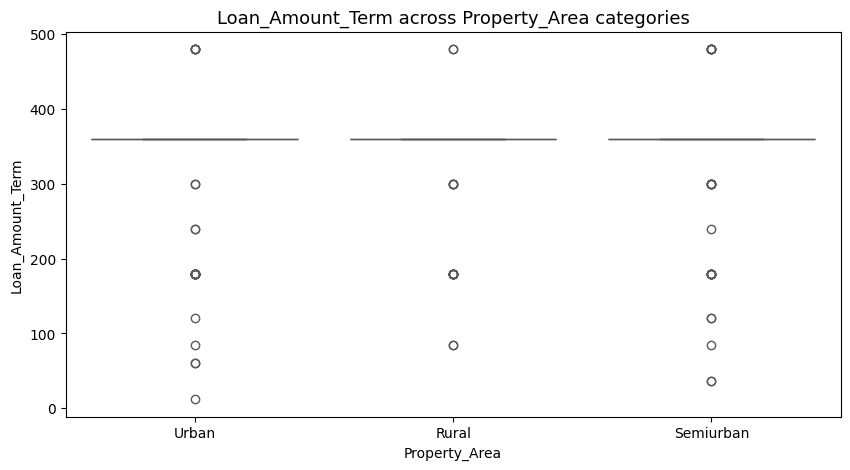

 Feature: Loan_Amount_Term vs income_rating
                     mean        std   min    max
income_rating                                    
High           341.710843  59.769766  60.0  480.0
Low            341.660934  67.340419  12.0  480.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


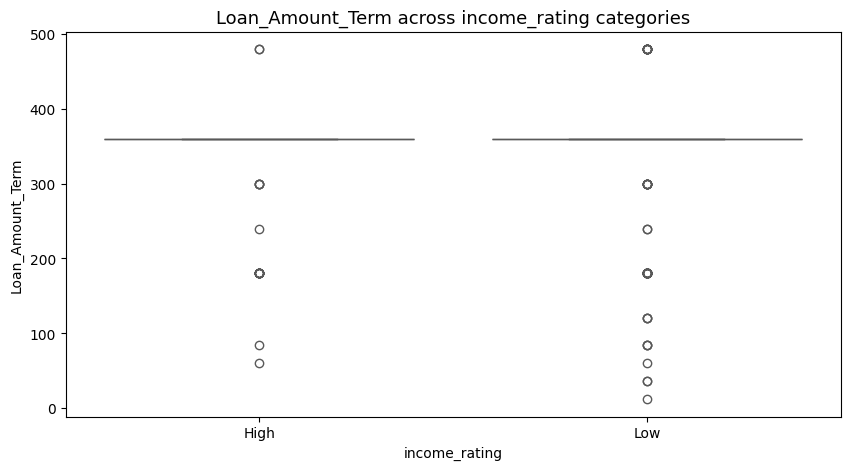

 Feature: Credit_History vs Gender
            mean       std  min  max
Gender                              
Female  0.858491  0.350202  0.0  1.0
Male    0.871520  0.334982  0.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


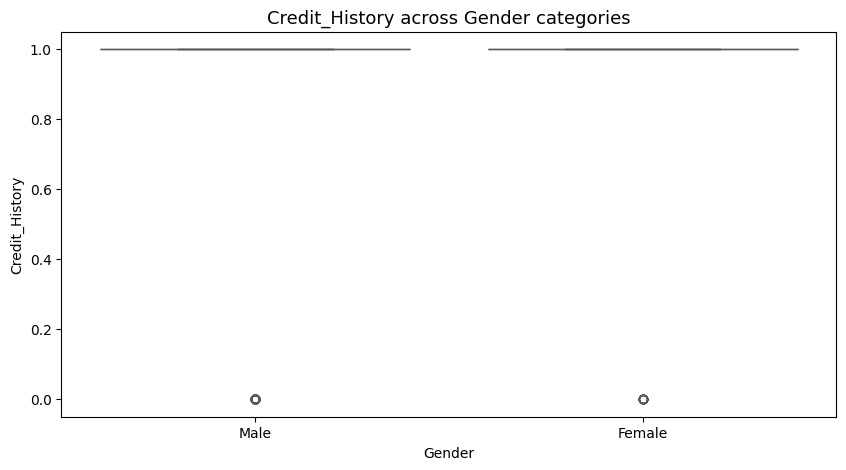

 Feature: Credit_History vs Married
             mean       std  min  max
Married                              
No       0.860697  0.347128  0.0  1.0
Yes      0.873656  0.332684  0.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


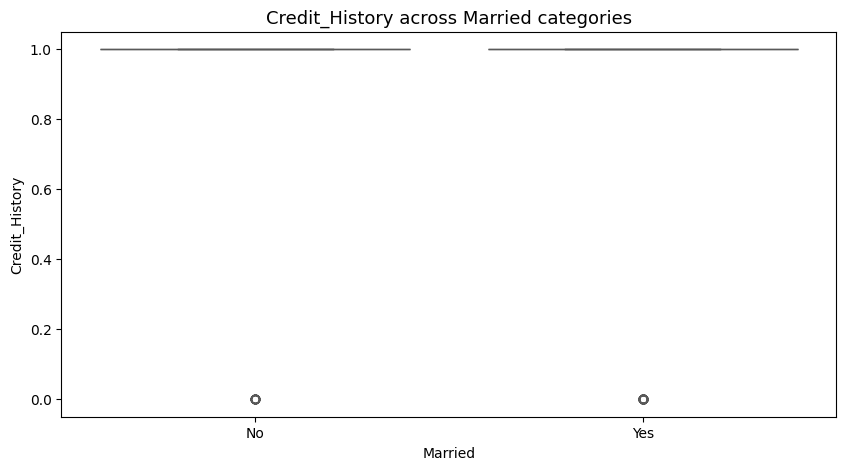

 Feature: Credit_History vs Education
                  mean       std  min  max
Education                                 
Graduate      0.877778  0.327907  0.0  1.0
Not Graduate  0.837398  0.370511  0.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


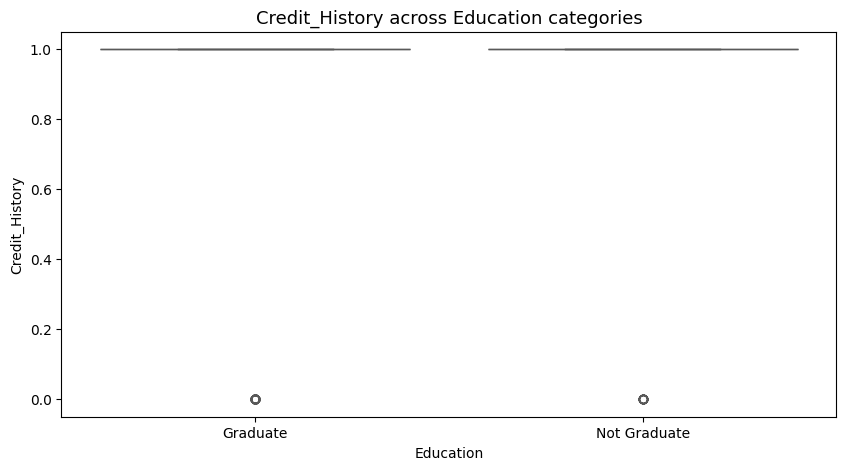

 Feature: Credit_History vs Self_Employed
                   mean       std  min  max
Self_Employed                              
No             0.873494  0.332753  0.0  1.0
Yes            0.840000  0.369075  0.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


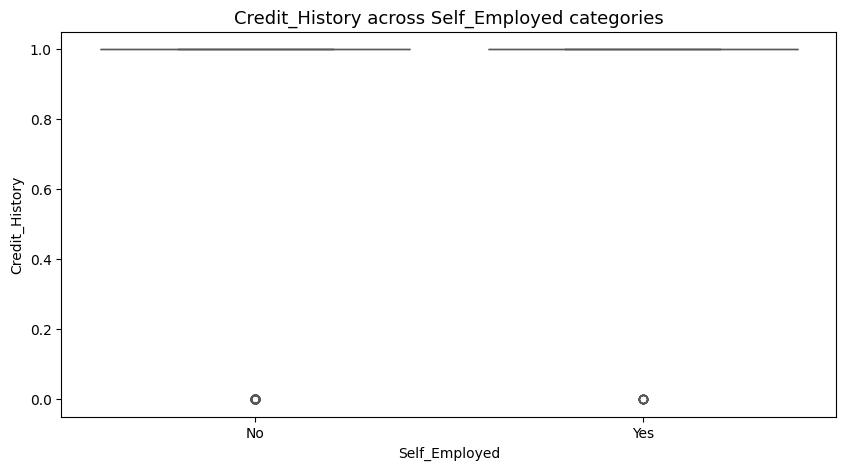

 Feature: Credit_History vs Property_Area
                   mean       std  min  max
Property_Area                              
Rural          0.857988  0.350100  0.0  1.0
Semiurban      0.885845  0.318728  0.0  1.0
Urban          0.859459  0.348490  0.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


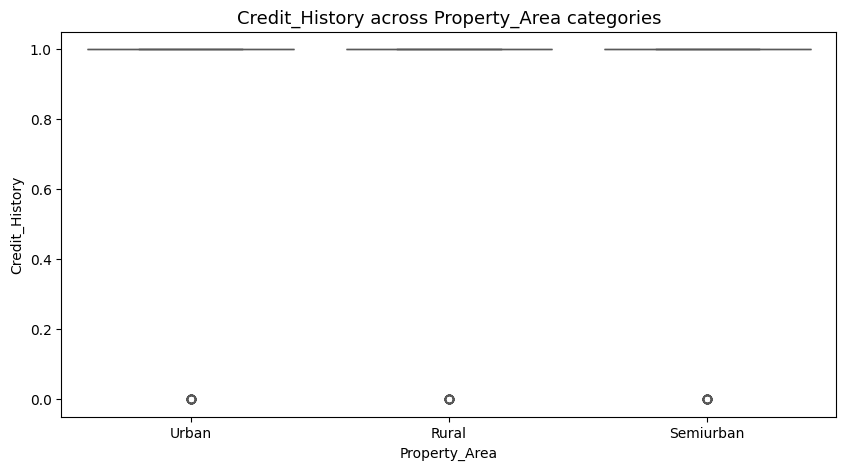

 Feature: Credit_History vs income_rating
                   mean       std  min  max
income_rating                              
High           0.879518  0.326509  0.0  1.0
Low            0.864865  0.342289  0.0  1.0



C:\Users\USER\AppData\Local\Temp\ipykernel_17788\2859194430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


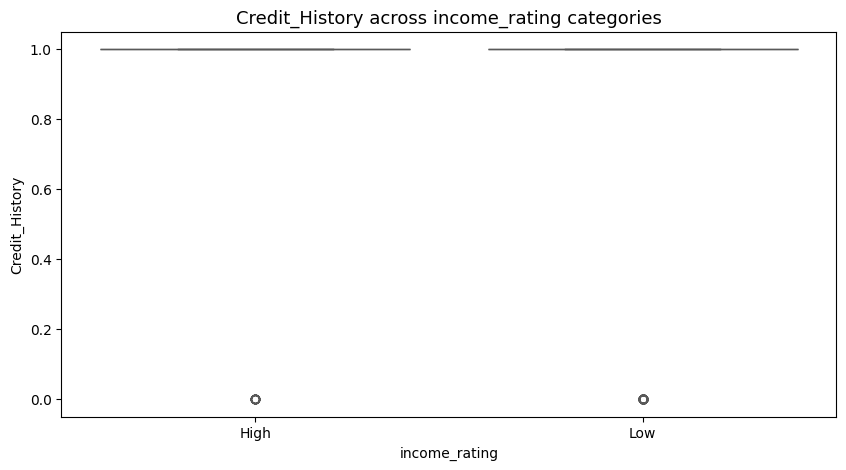

In [913]:
for num_col in num_features:
    for cat_col in cat_features:
        if cat_col == "Loan_Status":
            continue
        bivariate_num_cat(df, num_col, cat_col)



## Trivariate Analysis

In [914]:
def trivariate_plot(df, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


<Figure size 800x600 with 0 Axes>

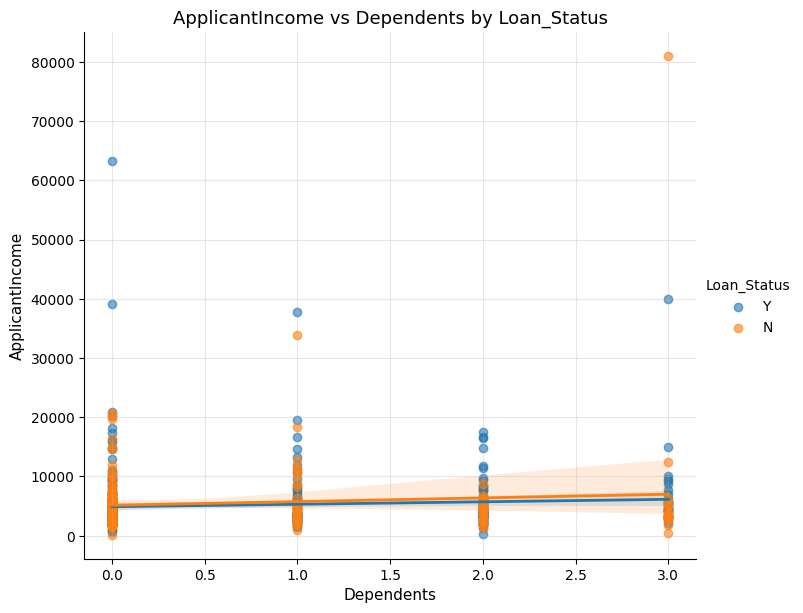

<Figure size 800x600 with 0 Axes>

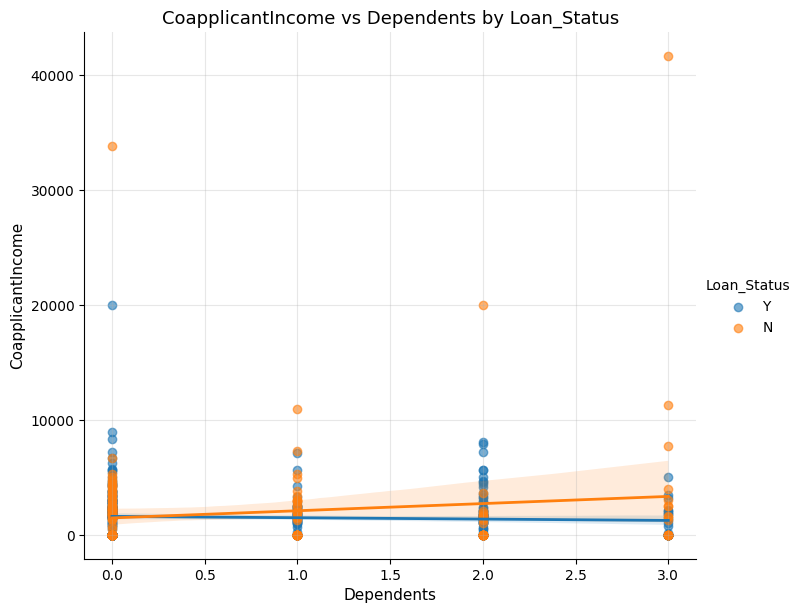

<Figure size 800x600 with 0 Axes>

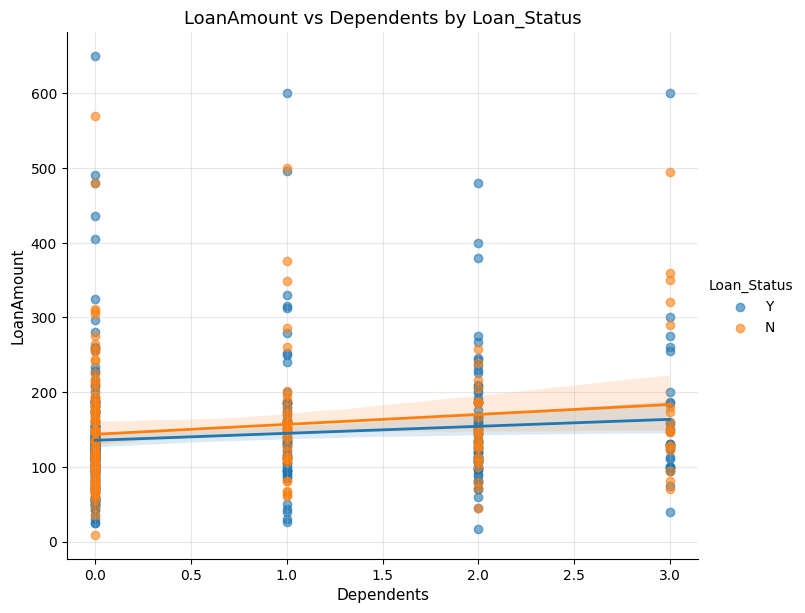

<Figure size 800x600 with 0 Axes>

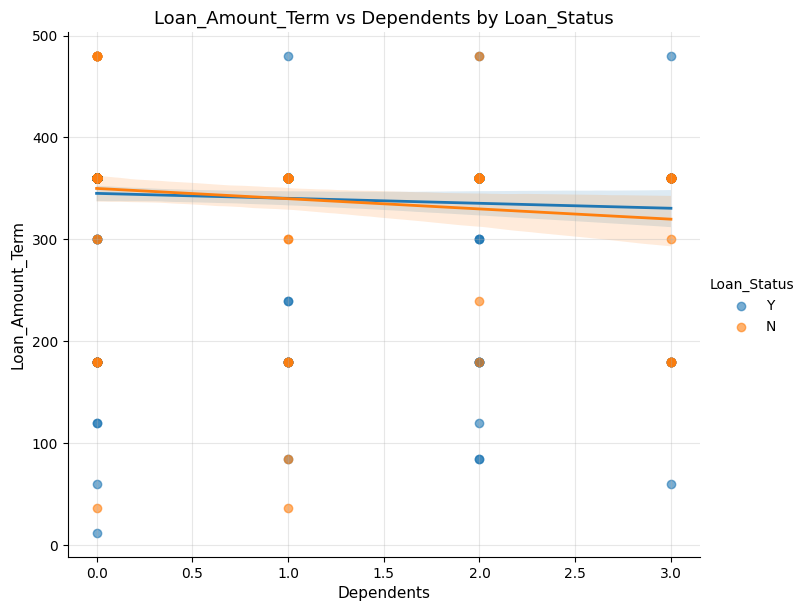

<Figure size 800x600 with 0 Axes>

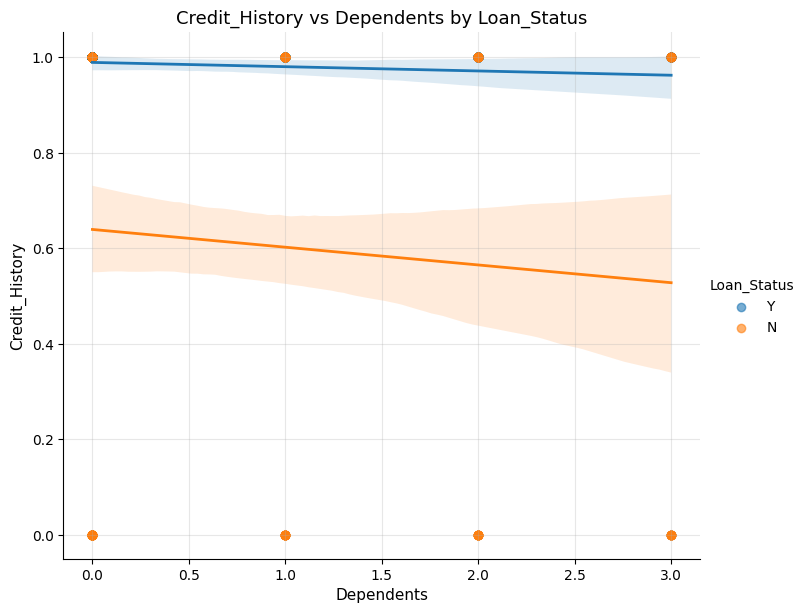

<Figure size 800x600 with 0 Axes>

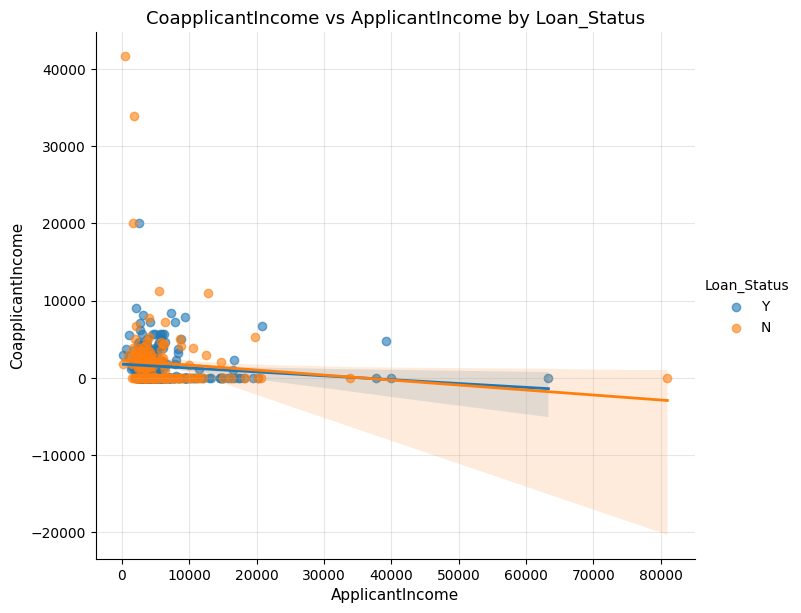

<Figure size 800x600 with 0 Axes>

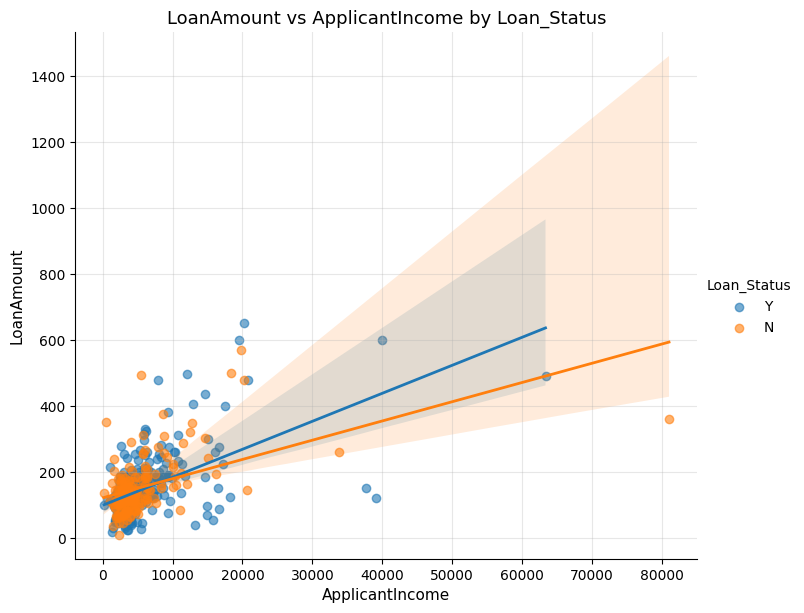

<Figure size 800x600 with 0 Axes>

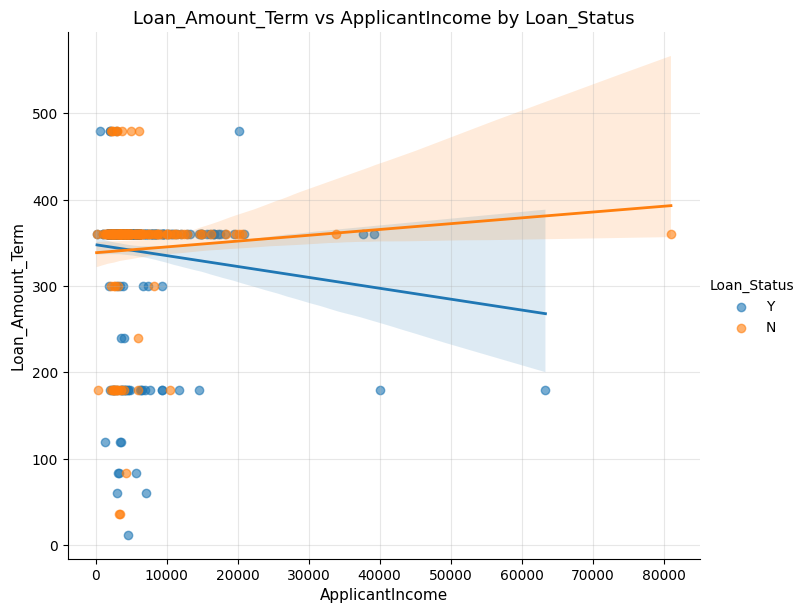

<Figure size 800x600 with 0 Axes>

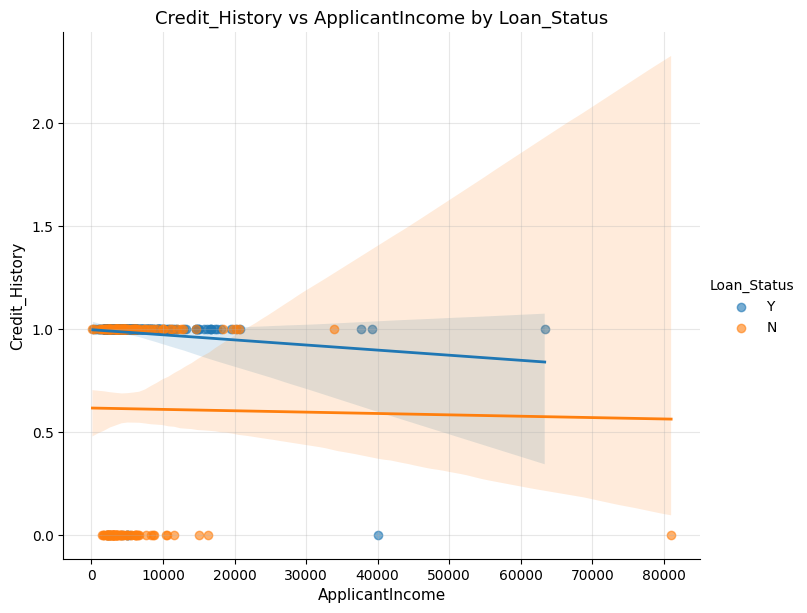

<Figure size 800x600 with 0 Axes>

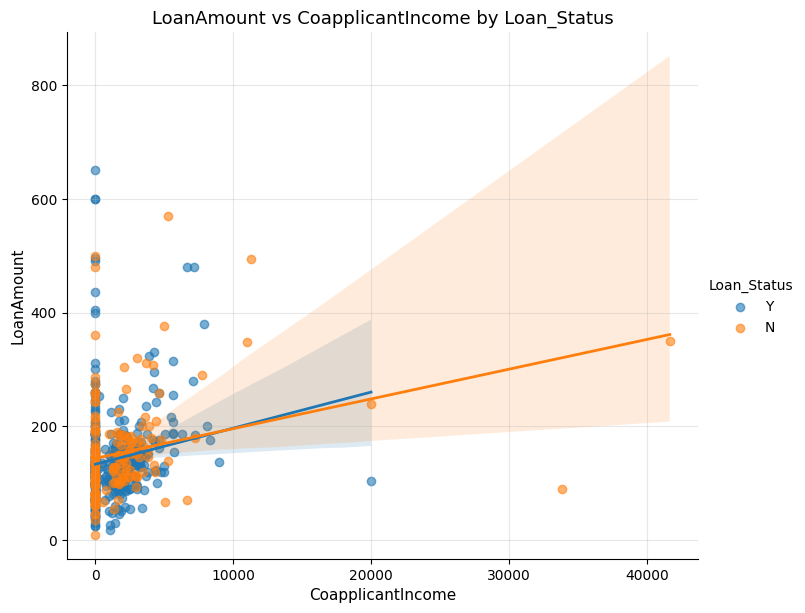

<Figure size 800x600 with 0 Axes>

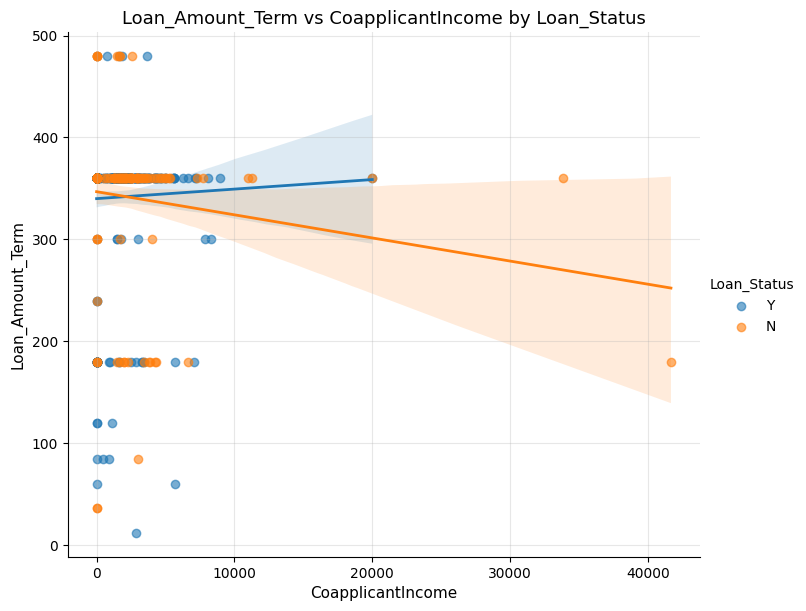

<Figure size 800x600 with 0 Axes>

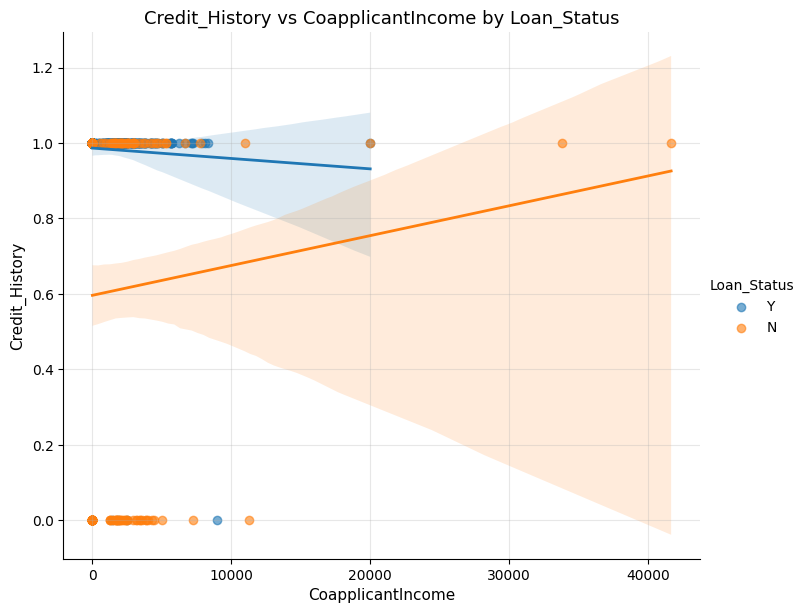

<Figure size 800x600 with 0 Axes>

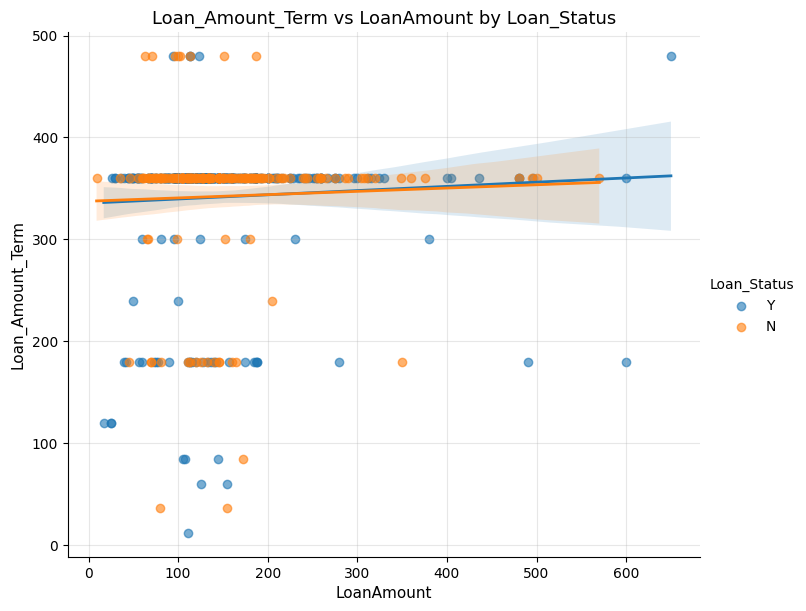

<Figure size 800x600 with 0 Axes>

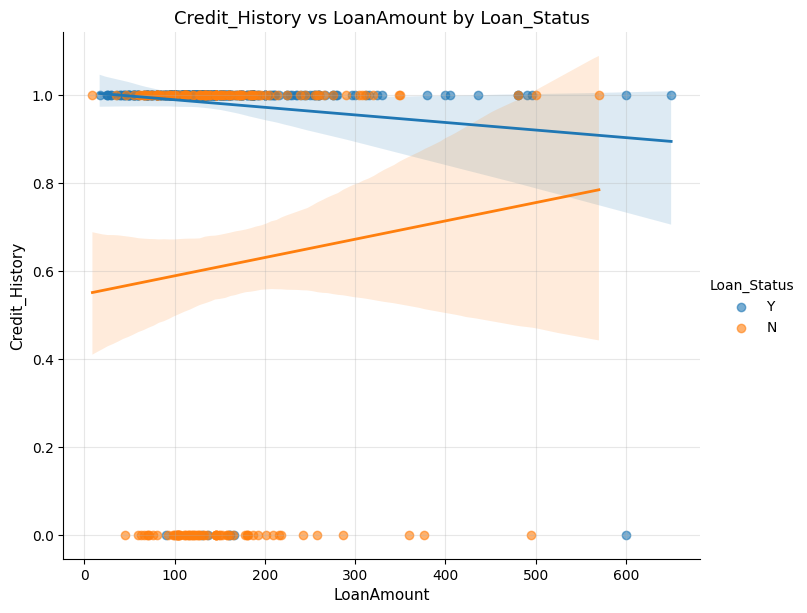

<Figure size 800x600 with 0 Axes>

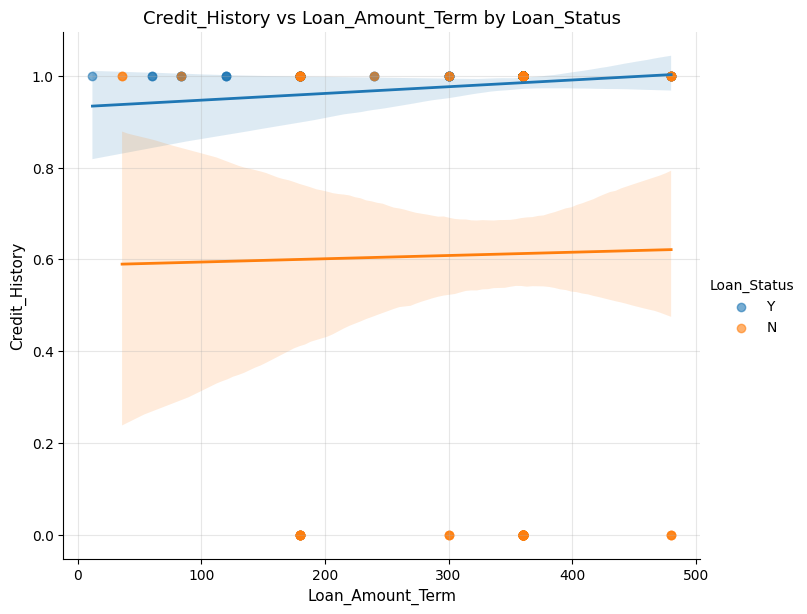

In [915]:
for i, feature1 in enumerate(num_features):
    for j, feature2 in enumerate(num_features):
        if j <= i:
            continue  # avoids duplicates and same feature pairing
        trivariate_plot(df, feature1, feature2, "Loan_Status")


## Grouped Summary

In [916]:
def num_grouped_summary(df):
    """
    Computes summary statistics grouped by wine quality.
    """
    summary = df.groupby('Loan_Status').mean(numeric_only=True).round(2)
    return summary


def cat_grouped_summary(df):
    """
    Computes percentage distribution of categorical features grouped by Loan_Status
    (similar to numeric grouped summary format).
    """
    cat_cols = df.select_dtypes(include='object').columns.drop('Loan_Status')

    summary = pd.DataFrame()

    for col in cat_cols:
        # Compute % distribution for each category within Loan_Status
        temp = pd.crosstab(df[col], df['Loan_Status'], normalize='columns') * 100

        # Rename index to show which feature it belongs to (optional but clearer)
        temp.index = [f"{col}: {i}" for i in temp.index]

        # Append to the summary table
        summary = pd.concat([summary, temp])

    # Round for readability
    return summary.round(2)


In [917]:
num_grouped_summary(df.drop(columns=["Loan_ID", "loan_status_label"]))

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,
N,0.75,5600.94,1937.74,153.55,342.38,0.61
Y,0.77,5208.73,1511.04,142.68,341.37,0.98


In [918]:
cat_grouped_summary(df.drop(columns=["Loan_ID", "loan_status_label"])).T

,Gender: Female,Gender: Male,Married: No,Married: Yes,Education: Graduate,Education: Not Graduate,Self_Employed: No,Self_Employed: Yes,Property_Area: Rural,Property_Area: Semiurban,Property_Area: Urban,income_rating: High,income_rating: Low
Loan_Status,,,,,,,,,,,,,
N,20.00,80.00,42.29,57.71,74.29,25.71,85.71,14.29,36.57,28.00,35.43,30.29,69.71
Y,17.84,82.16,31.91,68.09,80.40,19.60,87.44,12.56,26.38,42.71,30.90,28.39,71.61


In [ ]:
df.to_csv(f"preprocessing/loan_data.csv", index=False)